In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
# import seaborn as sns

#  데이터 불러오기

In [2]:
a = pd.read_csv('solorE/dangjin_fcst_data.csv', encoding = 'utf-8')    # 당진지역 발전소 동네 예보
b = pd.read_csv('solorE/dangjin_obs_data.csv', encoding = 'utf-8')    # 당진지역 발전소 인근 기상 관측 자료
c = pd.read_csv('solorE/energy.csv', encoding = 'utf-8')    # 발전소별 발전량
d = pd.read_csv('solorE/sample_submission.csv', encoding = 'utf-8')    # 예측한 발전량 제출 양식
e = pd.read_csv('solorE/site_info.csv', encoding = 'utf-8')    #발전소 정보
f = pd.read_csv('solorE/ulsan_fcst_data.csv', encoding = 'utf-8')    # 울산지역 발전소 동네 예보
g = pd.read_csv('solorE/ulsan_obs_data.csv', encoding = 'utf-8')    # 울산지역 발전소 인근 기상 관측 자료
c_dust = pd.read_csv('solorE/cheonan_dust.csv', encoding = 'euc-kr')    # 천안지역 미세먼지 데이터
u_dust = pd.read_csv('solorE/ulsan_dust.csv', encoding = 'euc-kr')    # 울산지역 미세먼지 데이터

In [3]:
a
# 당진지역 발전소 동네 예보

# Forecast time : 예보 발표 시점
# forecast : 예보 시간 (ex - Forecast time:2018-03-01 11:00:00, forecast:4.0 => 2018-03-01 11:00:00에 발표한 2018-03-01 15:00:00 예보
# 예보 발표 시점 'forecast'시간 후 기상 예보
# Temperature : 온도(℃)
# Humidity : 습도(%)
# WindSpeed : 풍속(m/s)
# WindDirection : 풍향(º)
# Cloud : 하늘상태(1-맑음, 2-구름보통, 3-구름많음, 4-흐림)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0
...,...,...,...,...,...,...,...
162203,2021-03-01 08:00:00,52.0,7.0,40.0,3.2,187.0,1.0
162204,2021-03-01 08:00:00,55.0,8.0,40.0,4.5,217.0,1.0
162205,2021-03-01 08:00:00,58.0,5.0,55.0,2.2,210.0,1.0
162206,2021-03-01 08:00:00,61.0,1.0,80.0,1.9,164.0,1.0


In [4]:
# b.drop(['지점','지점명'],1, inplace = True)
b
# b.loc[[3490,3491], '일시']
# 당진지역 발전소 인근 기상 관측 자료

# 지점 : 지점 코드
# 지점명 : 관측소 지점
# 일시 : 관측 시간
# 기온(°C) : 기온(°C)
# 풍속(m/s) : 풍속(m/s)
# 풍향(16방위) : 풍향(º)
# 습도(%) : 습도(%)
# 전운량(10분위) : 전운량(낮을 수록 구름이 적음)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0


In [5]:
# c.drop(range(3491, 3497),0, inplace = True)
# c.reset_index(inplace = True)
c.loc[3489]
# for i in b.index:
#     print(i, b.loc[i,'일시'], c.loc[i,'time'])

# b의 2018-07-24 11시~16시 공백


# 발전소별 발전량

# time : 1시간 단위 계량된 시간 (ex-2018-03-01 1:00:00 => 2018-03-01 00:00:00 ~ 2018-03-01 1:00:00 1시간동안 발전량 계량)
# dangjin_floating : 당진수상태양광 발전량(KW)
# dangjin_warehouse : 당진자재창고태양광 발전량(KW)
# dangjin : 당진태양광 발전량(KW)
# ulsan : 울산태양광 발전량(KW)

time                 2018-07-24 10:00:00
dangjin_floating                     300
dangjin_warehouse                    246
dangjin                              371
ulsan                                213
Name: 3489, dtype: object

In [19]:
b['발전량'] = c['dangjin_floating'].values

ValueError: Length of values does not match length of index

In [7]:
b

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0


In [30]:
c

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times
0,2018-03-01 00:00:00,0.0,0.0,0,0,2018-03-01,0:00:00
1,2018-03-01 01:00:00,0.0,0.0,0,0,2018-03-01,1:00:00
2,2018-03-01 02:00:00,0.0,0.0,0,0,2018-03-01,2:00:00
3,2018-03-01 03:00:00,0.0,0.0,0,0,2018-03-01,3:00:00
4,2018-03-01 04:00:00,0.0,0.0,0,0,2018-03-01,4:00:00
...,...,...,...,...,...,...,...
25627,2021-01-31 19:00:00,0.0,0.0,0,0,2021-01-31,19:00:00
25628,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31,20:00:00
25629,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31,21:00:00
25630,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31,22:00:00


In [109]:
for i in c.index:
    print(i, b.loc[i, '일시'], c.loc[i,'time'])

0 2018-03-01 00:00 2018-03-01 1:00:00
1 2018-03-01 01:00 2018-03-01 2:00:00
2 2018-03-01 02:00 2018-03-01 3:00:00
3 2018-03-01 03:00 2018-03-01 4:00:00
4 2018-03-01 04:00 2018-03-01 5:00:00
5 2018-03-01 05:00 2018-03-01 6:00:00
6 2018-03-01 06:00 2018-03-01 7:00:00
7 2018-03-01 07:00 2018-03-01 8:00:00
8 2018-03-01 08:00 2018-03-01 9:00:00
9 2018-03-01 09:00 2018-03-01 10:00:00
10 2018-03-01 10:00 2018-03-01 11:00:00
11 2018-03-01 11:00 2018-03-01 12:00:00
12 2018-03-01 12:00 2018-03-01 13:00:00
13 2018-03-01 13:00 2018-03-01 14:00:00
14 2018-03-01 14:00 2018-03-01 15:00:00
15 2018-03-01 15:00 2018-03-01 16:00:00
16 2018-03-01 16:00 2018-03-01 17:00:00
17 2018-03-01 17:00 2018-03-01 18:00:00
18 2018-03-01 18:00 2018-03-01 19:00:00
19 2018-03-01 19:00 2018-03-01 20:00:00
20 2018-03-01 20:00 2018-03-01 21:00:00
21 2018-03-01 21:00 2018-03-01 22:00:00
22 2018-03-01 22:00 2018-03-01 23:00:00
23 2018-03-01 23:00 2018-03-01 24:00:00
24 2018-03-02 00:00 2018-03-02 1:00:00
25 2018-03-02 01:00 

468 2018-03-20 12:00 2018-03-20 13:00:00
469 2018-03-20 13:00 2018-03-20 14:00:00
470 2018-03-20 14:00 2018-03-20 15:00:00
471 2018-03-20 15:00 2018-03-20 16:00:00
472 2018-03-20 16:00 2018-03-20 17:00:00
473 2018-03-20 17:00 2018-03-20 18:00:00
474 2018-03-20 18:00 2018-03-20 19:00:00
475 2018-03-20 19:00 2018-03-20 20:00:00
476 2018-03-20 20:00 2018-03-20 21:00:00
477 2018-03-20 21:00 2018-03-20 22:00:00
478 2018-03-20 22:00 2018-03-20 23:00:00
479 2018-03-20 23:00 2018-03-20 24:00:00
480 2018-03-21 00:00 2018-03-21 1:00:00
481 2018-03-21 01:00 2018-03-21 2:00:00
482 2018-03-21 02:00 2018-03-21 3:00:00
483 2018-03-21 03:00 2018-03-21 4:00:00
484 2018-03-21 04:00 2018-03-21 5:00:00
485 2018-03-21 05:00 2018-03-21 6:00:00
486 2018-03-21 06:00 2018-03-21 7:00:00
487 2018-03-21 07:00 2018-03-21 8:00:00
488 2018-03-21 08:00 2018-03-21 9:00:00
489 2018-03-21 09:00 2018-03-21 10:00:00
490 2018-03-21 10:00 2018-03-21 11:00:00
491 2018-03-21 11:00 2018-03-21 12:00:00
492 2018-03-21 12:00 2018

747 2018-04-01 03:00 2018-04-01 4:00:00
748 2018-04-01 04:00 2018-04-01 5:00:00
749 2018-04-01 05:00 2018-04-01 6:00:00
750 2018-04-01 06:00 2018-04-01 7:00:00
751 2018-04-01 07:00 2018-04-01 8:00:00
752 2018-04-01 08:00 2018-04-01 9:00:00
753 2018-04-01 09:00 2018-04-01 10:00:00
754 2018-04-01 10:00 2018-04-01 11:00:00
755 2018-04-01 11:00 2018-04-01 12:00:00
756 2018-04-01 12:00 2018-04-01 13:00:00
757 2018-04-01 13:00 2018-04-01 14:00:00
758 2018-04-01 14:00 2018-04-01 15:00:00
759 2018-04-01 15:00 2018-04-01 16:00:00
760 2018-04-01 16:00 2018-04-01 17:00:00
761 2018-04-01 17:00 2018-04-01 18:00:00
762 2018-04-01 18:00 2018-04-01 19:00:00
763 2018-04-01 19:00 2018-04-01 20:00:00
764 2018-04-01 20:00 2018-04-01 21:00:00
765 2018-04-01 21:00 2018-04-01 22:00:00
766 2018-04-01 22:00 2018-04-01 23:00:00
767 2018-04-01 23:00 2018-04-01 24:00:00
768 2018-04-02 00:00 2018-04-02 1:00:00
769 2018-04-02 01:00 2018-04-02 2:00:00
770 2018-04-02 02:00 2018-04-02 3:00:00
771 2018-04-02 03:00 2018

1036 2018-04-13 04:00 2018-04-13 5:00:00
1037 2018-04-13 05:00 2018-04-13 6:00:00
1038 2018-04-13 06:00 2018-04-13 7:00:00
1039 2018-04-13 07:00 2018-04-13 8:00:00
1040 2018-04-13 08:00 2018-04-13 9:00:00
1041 2018-04-13 09:00 2018-04-13 10:00:00
1042 2018-04-13 10:00 2018-04-13 11:00:00
1043 2018-04-13 11:00 2018-04-13 12:00:00
1044 2018-04-13 12:00 2018-04-13 13:00:00
1045 2018-04-13 13:00 2018-04-13 14:00:00
1046 2018-04-13 14:00 2018-04-13 15:00:00
1047 2018-04-13 15:00 2018-04-13 16:00:00
1048 2018-04-13 16:00 2018-04-13 17:00:00
1049 2018-04-13 17:00 2018-04-13 18:00:00
1050 2018-04-13 18:00 2018-04-13 19:00:00
1051 2018-04-13 19:00 2018-04-13 20:00:00
1052 2018-04-13 20:00 2018-04-13 21:00:00
1053 2018-04-13 21:00 2018-04-13 22:00:00
1054 2018-04-13 22:00 2018-04-13 23:00:00
1055 2018-04-13 23:00 2018-04-13 24:00:00
1056 2018-04-14 00:00 2018-04-14 1:00:00
1057 2018-04-14 01:00 2018-04-14 2:00:00
1058 2018-04-14 02:00 2018-04-14 3:00:00
1059 2018-04-14 03:00 2018-04-14 4:00:00
1

1369 2018-04-27 01:00 2018-04-27 2:00:00
1370 2018-04-27 02:00 2018-04-27 3:00:00
1371 2018-04-27 03:00 2018-04-27 4:00:00
1372 2018-04-27 04:00 2018-04-27 5:00:00
1373 2018-04-27 05:00 2018-04-27 6:00:00
1374 2018-04-27 06:00 2018-04-27 7:00:00
1375 2018-04-27 07:00 2018-04-27 8:00:00
1376 2018-04-27 08:00 2018-04-27 9:00:00
1377 2018-04-27 09:00 2018-04-27 10:00:00
1378 2018-04-27 10:00 2018-04-27 11:00:00
1379 2018-04-27 11:00 2018-04-27 12:00:00
1380 2018-04-27 12:00 2018-04-27 13:00:00
1381 2018-04-27 13:00 2018-04-27 14:00:00
1382 2018-04-27 14:00 2018-04-27 15:00:00
1383 2018-04-27 15:00 2018-04-27 16:00:00
1384 2018-04-27 16:00 2018-04-27 17:00:00
1385 2018-04-27 17:00 2018-04-27 18:00:00
1386 2018-04-27 18:00 2018-04-27 19:00:00
1387 2018-04-27 19:00 2018-04-27 20:00:00
1388 2018-04-27 20:00 2018-04-27 21:00:00
1389 2018-04-27 21:00 2018-04-27 22:00:00
1390 2018-04-27 22:00 2018-04-27 23:00:00
1391 2018-04-27 23:00 2018-04-27 24:00:00
1392 2018-04-28 00:00 2018-04-28 1:00:00
1

1702 2018-05-10 22:00 2018-05-10 23:00:00
1703 2018-05-10 23:00 2018-05-10 24:00:00
1704 2018-05-11 00:00 2018-05-11 1:00:00
1705 2018-05-11 01:00 2018-05-11 2:00:00
1706 2018-05-11 02:00 2018-05-11 3:00:00
1707 2018-05-11 03:00 2018-05-11 4:00:00
1708 2018-05-11 04:00 2018-05-11 5:00:00
1709 2018-05-11 05:00 2018-05-11 6:00:00
1710 2018-05-11 06:00 2018-05-11 7:00:00
1711 2018-05-11 07:00 2018-05-11 8:00:00
1712 2018-05-11 08:00 2018-05-11 9:00:00
1713 2018-05-11 09:00 2018-05-11 10:00:00
1714 2018-05-11 10:00 2018-05-11 11:00:00
1715 2018-05-11 11:00 2018-05-11 12:00:00
1716 2018-05-11 12:00 2018-05-11 13:00:00
1717 2018-05-11 13:00 2018-05-11 14:00:00
1718 2018-05-11 14:00 2018-05-11 15:00:00
1719 2018-05-11 15:00 2018-05-11 16:00:00
1720 2018-05-11 16:00 2018-05-11 17:00:00
1721 2018-05-11 17:00 2018-05-11 18:00:00
1722 2018-05-11 18:00 2018-05-11 19:00:00
1723 2018-05-11 19:00 2018-05-11 20:00:00
1724 2018-05-11 20:00 2018-05-11 21:00:00
1725 2018-05-11 21:00 2018-05-11 22:00:00
1

1902 2018-05-19 06:00 2018-05-19 7:00:00
1903 2018-05-19 07:00 2018-05-19 8:00:00
1904 2018-05-19 08:00 2018-05-19 9:00:00
1905 2018-05-19 09:00 2018-05-19 10:00:00
1906 2018-05-19 10:00 2018-05-19 11:00:00
1907 2018-05-19 11:00 2018-05-19 12:00:00
1908 2018-05-19 12:00 2018-05-19 13:00:00
1909 2018-05-19 13:00 2018-05-19 14:00:00
1910 2018-05-19 14:00 2018-05-19 15:00:00
1911 2018-05-19 15:00 2018-05-19 16:00:00
1912 2018-05-19 16:00 2018-05-19 17:00:00
1913 2018-05-19 17:00 2018-05-19 18:00:00
1914 2018-05-19 18:00 2018-05-19 19:00:00
1915 2018-05-19 19:00 2018-05-19 20:00:00
1916 2018-05-19 20:00 2018-05-19 21:00:00
1917 2018-05-19 21:00 2018-05-19 22:00:00
1918 2018-05-19 22:00 2018-05-19 23:00:00
1919 2018-05-19 23:00 2018-05-19 24:00:00
1920 2018-05-20 00:00 2018-05-20 1:00:00
1921 2018-05-20 01:00 2018-05-20 2:00:00
1922 2018-05-20 02:00 2018-05-20 3:00:00
1923 2018-05-20 03:00 2018-05-20 4:00:00
1924 2018-05-20 04:00 2018-05-20 5:00:00
1925 2018-05-20 05:00 2018-05-20 6:00:00
1

2115 2018-05-28 03:00 2018-05-28 4:00:00
2116 2018-05-28 04:00 2018-05-28 5:00:00
2117 2018-05-28 05:00 2018-05-28 6:00:00
2118 2018-05-28 06:00 2018-05-28 7:00:00
2119 2018-05-28 07:00 2018-05-28 8:00:00
2120 2018-05-28 08:00 2018-05-28 9:00:00
2121 2018-05-28 09:00 2018-05-28 10:00:00
2122 2018-05-28 10:00 2018-05-28 11:00:00
2123 2018-05-28 11:00 2018-05-28 12:00:00
2124 2018-05-28 12:00 2018-05-28 13:00:00
2125 2018-05-28 13:00 2018-05-28 14:00:00
2126 2018-05-28 14:00 2018-05-28 15:00:00
2127 2018-05-28 15:00 2018-05-28 16:00:00
2128 2018-05-28 16:00 2018-05-28 17:00:00
2129 2018-05-28 17:00 2018-05-28 18:00:00
2130 2018-05-28 18:00 2018-05-28 19:00:00
2131 2018-05-28 19:00 2018-05-28 20:00:00
2132 2018-05-28 20:00 2018-05-28 21:00:00
2133 2018-05-28 21:00 2018-05-28 22:00:00
2134 2018-05-28 22:00 2018-05-28 23:00:00
2135 2018-05-28 23:00 2018-05-28 24:00:00
2136 2018-05-29 00:00 2018-05-29 1:00:00
2137 2018-05-29 01:00 2018-05-29 2:00:00
2138 2018-05-29 02:00 2018-05-29 3:00:00
2

2368 2018-06-07 16:00 2018-06-07 17:00:00
2369 2018-06-07 17:00 2018-06-07 18:00:00
2370 2018-06-07 18:00 2018-06-07 19:00:00
2371 2018-06-07 19:00 2018-06-07 20:00:00
2372 2018-06-07 20:00 2018-06-07 21:00:00
2373 2018-06-07 21:00 2018-06-07 22:00:00
2374 2018-06-07 22:00 2018-06-07 23:00:00
2375 2018-06-07 23:00 2018-06-07 24:00:00
2376 2018-06-08 00:00 2018-06-08 1:00:00
2377 2018-06-08 01:00 2018-06-08 2:00:00
2378 2018-06-08 02:00 2018-06-08 3:00:00
2379 2018-06-08 03:00 2018-06-08 4:00:00
2380 2018-06-08 04:00 2018-06-08 5:00:00
2381 2018-06-08 05:00 2018-06-08 6:00:00
2382 2018-06-08 06:00 2018-06-08 7:00:00
2383 2018-06-08 07:00 2018-06-08 8:00:00
2384 2018-06-08 08:00 2018-06-08 9:00:00
2385 2018-06-08 09:00 2018-06-08 10:00:00
2386 2018-06-08 10:00 2018-06-08 11:00:00
2387 2018-06-08 11:00 2018-06-08 12:00:00
2388 2018-06-08 12:00 2018-06-08 13:00:00
2389 2018-06-08 13:00 2018-06-08 14:00:00
2390 2018-06-08 14:00 2018-06-08 15:00:00
2391 2018-06-08 15:00 2018-06-08 16:00:00
2

2570 2018-06-16 02:00 2018-06-16 3:00:00
2571 2018-06-16 03:00 2018-06-16 4:00:00
2572 2018-06-16 04:00 2018-06-16 5:00:00
2573 2018-06-16 05:00 2018-06-16 6:00:00
2574 2018-06-16 06:00 2018-06-16 7:00:00
2575 2018-06-16 07:00 2018-06-16 8:00:00
2576 2018-06-16 08:00 2018-06-16 9:00:00
2577 2018-06-16 09:00 2018-06-16 10:00:00
2578 2018-06-16 10:00 2018-06-16 11:00:00
2579 2018-06-16 11:00 2018-06-16 12:00:00
2580 2018-06-16 12:00 2018-06-16 13:00:00
2581 2018-06-16 13:00 2018-06-16 14:00:00
2582 2018-06-16 14:00 2018-06-16 15:00:00
2583 2018-06-16 15:00 2018-06-16 16:00:00
2584 2018-06-16 16:00 2018-06-16 17:00:00
2585 2018-06-16 17:00 2018-06-16 18:00:00
2586 2018-06-16 18:00 2018-06-16 19:00:00
2587 2018-06-16 19:00 2018-06-16 20:00:00
2588 2018-06-16 20:00 2018-06-16 21:00:00
2589 2018-06-16 21:00 2018-06-16 22:00:00
2590 2018-06-16 22:00 2018-06-16 23:00:00
2591 2018-06-16 23:00 2018-06-16 24:00:00
2592 2018-06-17 00:00 2018-06-17 1:00:00
2593 2018-06-17 01:00 2018-06-17 2:00:00
2

2774 2018-06-24 14:00 2018-06-24 15:00:00
2775 2018-06-24 15:00 2018-06-24 16:00:00
2776 2018-06-24 16:00 2018-06-24 17:00:00
2777 2018-06-24 17:00 2018-06-24 18:00:00
2778 2018-06-24 18:00 2018-06-24 19:00:00
2779 2018-06-24 19:00 2018-06-24 20:00:00
2780 2018-06-24 20:00 2018-06-24 21:00:00
2781 2018-06-24 21:00 2018-06-24 22:00:00
2782 2018-06-24 22:00 2018-06-24 23:00:00
2783 2018-06-24 23:00 2018-06-24 24:00:00
2784 2018-06-25 00:00 2018-06-25 1:00:00
2785 2018-06-25 01:00 2018-06-25 2:00:00
2786 2018-06-25 02:00 2018-06-25 3:00:00
2787 2018-06-25 03:00 2018-06-25 4:00:00
2788 2018-06-25 04:00 2018-06-25 5:00:00
2789 2018-06-25 05:00 2018-06-25 6:00:00
2790 2018-06-25 06:00 2018-06-25 7:00:00
2791 2018-06-25 07:00 2018-06-25 8:00:00
2792 2018-06-25 08:00 2018-06-25 9:00:00
2793 2018-06-25 09:00 2018-06-25 10:00:00
2794 2018-06-25 10:00 2018-06-25 11:00:00
2795 2018-06-25 11:00 2018-06-25 12:00:00
2796 2018-06-25 12:00 2018-06-25 13:00:00
2797 2018-06-25 13:00 2018-06-25 14:00:00
2

3230 2018-07-13 14:00 2018-07-13 15:00:00
3231 2018-07-13 15:00 2018-07-13 16:00:00
3232 2018-07-13 16:00 2018-07-13 17:00:00
3233 2018-07-13 17:00 2018-07-13 18:00:00
3234 2018-07-13 18:00 2018-07-13 19:00:00
3235 2018-07-13 19:00 2018-07-13 20:00:00
3236 2018-07-13 20:00 2018-07-13 21:00:00
3237 2018-07-13 21:00 2018-07-13 22:00:00
3238 2018-07-13 22:00 2018-07-13 23:00:00
3239 2018-07-13 23:00 2018-07-13 24:00:00
3240 2018-07-14 00:00 2018-07-14 1:00:00
3241 2018-07-14 01:00 2018-07-14 2:00:00
3242 2018-07-14 02:00 2018-07-14 3:00:00
3243 2018-07-14 03:00 2018-07-14 4:00:00
3244 2018-07-14 04:00 2018-07-14 5:00:00
3245 2018-07-14 05:00 2018-07-14 6:00:00
3246 2018-07-14 06:00 2018-07-14 7:00:00
3247 2018-07-14 07:00 2018-07-14 8:00:00
3248 2018-07-14 08:00 2018-07-14 9:00:00
3249 2018-07-14 09:00 2018-07-14 10:00:00
3250 2018-07-14 10:00 2018-07-14 11:00:00
3251 2018-07-14 11:00 2018-07-14 12:00:00
3252 2018-07-14 12:00 2018-07-14 13:00:00
3253 2018-07-14 13:00 2018-07-14 14:00:00
3

3437 2018-07-22 05:00 2018-07-22 6:00:00
3438 2018-07-22 06:00 2018-07-22 7:00:00
3439 2018-07-22 07:00 2018-07-22 8:00:00
3440 2018-07-22 08:00 2018-07-22 9:00:00
3441 2018-07-22 09:00 2018-07-22 10:00:00
3442 2018-07-22 10:00 2018-07-22 11:00:00
3443 2018-07-22 11:00 2018-07-22 12:00:00
3444 2018-07-22 12:00 2018-07-22 13:00:00
3445 2018-07-22 13:00 2018-07-22 14:00:00
3446 2018-07-22 14:00 2018-07-22 15:00:00
3447 2018-07-22 15:00 2018-07-22 16:00:00
3448 2018-07-22 16:00 2018-07-22 17:00:00
3449 2018-07-22 17:00 2018-07-22 18:00:00
3450 2018-07-22 18:00 2018-07-22 19:00:00
3451 2018-07-22 19:00 2018-07-22 20:00:00
3452 2018-07-22 20:00 2018-07-22 21:00:00
3453 2018-07-22 21:00 2018-07-22 22:00:00
3454 2018-07-22 22:00 2018-07-22 23:00:00
3455 2018-07-22 23:00 2018-07-22 24:00:00
3456 2018-07-23 00:00 2018-07-23 1:00:00
3457 2018-07-23 01:00 2018-07-23 2:00:00
3458 2018-07-23 02:00 2018-07-23 3:00:00
3459 2018-07-23 03:00 2018-07-23 4:00:00
3460 2018-07-23 04:00 2018-07-23 5:00:00
3

3744 2018-08-04 06:00 2018-08-04 7:00:00
3745 2018-08-04 07:00 2018-08-04 8:00:00
3746 2018-08-04 08:00 2018-08-04 9:00:00
3747 2018-08-04 09:00 2018-08-04 10:00:00
3748 2018-08-04 10:00 2018-08-04 11:00:00
3749 2018-08-04 11:00 2018-08-04 12:00:00
3750 2018-08-04 12:00 2018-08-04 13:00:00
3751 2018-08-04 13:00 2018-08-04 14:00:00
3752 2018-08-04 14:00 2018-08-04 15:00:00
3753 2018-08-04 15:00 2018-08-04 16:00:00
3754 2018-08-04 16:00 2018-08-04 17:00:00
3755 2018-08-04 17:00 2018-08-04 18:00:00
3756 2018-08-04 18:00 2018-08-04 19:00:00
3757 2018-08-04 19:00 2018-08-04 20:00:00
3758 2018-08-04 20:00 2018-08-04 21:00:00
3759 2018-08-04 21:00 2018-08-04 22:00:00
3760 2018-08-04 22:00 2018-08-04 23:00:00
3761 2018-08-04 23:00 2018-08-04 24:00:00
3762 2018-08-05 00:00 2018-08-05 1:00:00
3763 2018-08-05 01:00 2018-08-05 2:00:00
3764 2018-08-05 02:00 2018-08-05 3:00:00
3765 2018-08-05 03:00 2018-08-05 4:00:00
3766 2018-08-05 04:00 2018-08-05 5:00:00
3767 2018-08-05 05:00 2018-08-05 6:00:00
3

4034 2018-08-16 08:00 2018-08-16 9:00:00
4035 2018-08-16 09:00 2018-08-16 10:00:00
4036 2018-08-16 10:00 2018-08-16 11:00:00
4037 2018-08-16 11:00 2018-08-16 12:00:00
4038 2018-08-16 12:00 2018-08-16 13:00:00
4039 2018-08-16 13:00 2018-08-16 14:00:00
4040 2018-08-16 14:00 2018-08-16 15:00:00
4041 2018-08-16 15:00 2018-08-16 16:00:00
4042 2018-08-16 16:00 2018-08-16 17:00:00
4043 2018-08-16 17:00 2018-08-16 18:00:00
4044 2018-08-16 18:00 2018-08-16 19:00:00
4045 2018-08-16 19:00 2018-08-16 20:00:00
4046 2018-08-16 20:00 2018-08-16 21:00:00
4047 2018-08-16 21:00 2018-08-16 22:00:00
4048 2018-08-16 22:00 2018-08-16 23:00:00
4049 2018-08-16 23:00 2018-08-16 24:00:00
4050 2018-08-17 00:00 2018-08-17 1:00:00
4051 2018-08-17 01:00 2018-08-17 2:00:00
4052 2018-08-17 02:00 2018-08-17 3:00:00
4053 2018-08-17 03:00 2018-08-17 4:00:00
4054 2018-08-17 04:00 2018-08-17 5:00:00
4055 2018-08-17 05:00 2018-08-17 6:00:00
4056 2018-08-17 06:00 2018-08-17 7:00:00
4057 2018-08-17 07:00 2018-08-17 8:00:00
4

4277 2018-08-26 11:00 2018-08-26 12:00:00
4278 2018-08-26 12:00 2018-08-26 13:00:00
4279 2018-08-26 13:00 2018-08-26 14:00:00
4280 2018-08-26 14:00 2018-08-26 15:00:00
4281 2018-08-26 15:00 2018-08-26 16:00:00
4282 2018-08-26 16:00 2018-08-26 17:00:00
4283 2018-08-26 17:00 2018-08-26 18:00:00
4284 2018-08-26 18:00 2018-08-26 19:00:00
4285 2018-08-26 19:00 2018-08-26 20:00:00
4286 2018-08-26 20:00 2018-08-26 21:00:00
4287 2018-08-26 21:00 2018-08-26 22:00:00
4288 2018-08-26 22:00 2018-08-26 23:00:00
4289 2018-08-26 23:00 2018-08-26 24:00:00
4290 2018-08-27 00:00 2018-08-27 1:00:00
4291 2018-08-27 01:00 2018-08-27 2:00:00
4292 2018-08-27 02:00 2018-08-27 3:00:00
4293 2018-08-27 03:00 2018-08-27 4:00:00
4294 2018-08-27 04:00 2018-08-27 5:00:00
4295 2018-08-27 05:00 2018-08-27 6:00:00
4296 2018-08-27 06:00 2018-08-27 7:00:00
4297 2018-08-27 07:00 2018-08-27 8:00:00
4298 2018-08-27 08:00 2018-08-27 9:00:00
4299 2018-08-27 09:00 2018-08-27 10:00:00
4300 2018-08-27 10:00 2018-08-27 11:00:00
4

4694 2018-09-12 20:00 2018-09-12 21:00:00
4695 2018-09-12 21:00 2018-09-12 22:00:00
4696 2018-09-12 22:00 2018-09-12 23:00:00
4697 2018-09-12 23:00 2018-09-12 24:00:00
4698 2018-09-13 00:00 2018-09-13 1:00:00
4699 2018-09-13 01:00 2018-09-13 2:00:00
4700 2018-09-13 02:00 2018-09-13 3:00:00
4701 2018-09-13 03:00 2018-09-13 4:00:00
4702 2018-09-13 04:00 2018-09-13 5:00:00
4703 2018-09-13 05:00 2018-09-13 6:00:00
4704 2018-09-13 06:00 2018-09-13 7:00:00
4705 2018-09-13 07:00 2018-09-13 8:00:00
4706 2018-09-13 08:00 2018-09-13 9:00:00
4707 2018-09-13 09:00 2018-09-13 10:00:00
4708 2018-09-13 10:00 2018-09-13 11:00:00
4709 2018-09-13 11:00 2018-09-13 12:00:00
4710 2018-09-13 12:00 2018-09-13 13:00:00
4711 2018-09-13 13:00 2018-09-13 14:00:00
4712 2018-09-13 14:00 2018-09-13 15:00:00
4713 2018-09-13 15:00 2018-09-13 16:00:00
4714 2018-09-13 16:00 2018-09-13 17:00:00
4715 2018-09-13 17:00 2018-09-13 18:00:00
4716 2018-09-13 18:00 2018-09-13 19:00:00
4717 2018-09-13 19:00 2018-09-13 20:00:00
4

4928 2018-09-22 14:00 2018-09-22 15:00:00
4929 2018-09-22 15:00 2018-09-22 16:00:00
4930 2018-09-22 16:00 2018-09-22 17:00:00
4931 2018-09-22 17:00 2018-09-22 18:00:00
4932 2018-09-22 18:00 2018-09-22 19:00:00
4933 2018-09-22 19:00 2018-09-22 20:00:00
4934 2018-09-22 20:00 2018-09-22 21:00:00
4935 2018-09-22 21:00 2018-09-22 22:00:00
4936 2018-09-22 22:00 2018-09-22 23:00:00
4937 2018-09-22 23:00 2018-09-22 24:00:00
4938 2018-09-23 00:00 2018-09-23 1:00:00
4939 2018-09-23 01:00 2018-09-23 2:00:00
4940 2018-09-23 02:00 2018-09-23 3:00:00
4941 2018-09-23 03:00 2018-09-23 4:00:00
4942 2018-09-23 04:00 2018-09-23 5:00:00
4943 2018-09-23 05:00 2018-09-23 6:00:00
4944 2018-09-23 06:00 2018-09-23 7:00:00
4945 2018-09-23 07:00 2018-09-23 8:00:00
4946 2018-09-23 08:00 2018-09-23 9:00:00
4947 2018-09-23 09:00 2018-09-23 10:00:00
4948 2018-09-23 10:00 2018-09-23 11:00:00
4949 2018-09-23 11:00 2018-09-23 12:00:00
4950 2018-09-23 12:00 2018-09-23 13:00:00
4951 2018-09-23 13:00 2018-09-23 14:00:00
4

5273 2018-10-06 23:00 2018-10-06 24:00:00
5274 2018-10-07 00:00 2018-10-07 1:00:00
5275 2018-10-07 01:00 2018-10-07 2:00:00
5276 2018-10-07 02:00 2018-10-07 3:00:00
5277 2018-10-07 03:00 2018-10-07 4:00:00
5278 2018-10-07 04:00 2018-10-07 5:00:00
5279 2018-10-07 05:00 2018-10-07 6:00:00
5280 2018-10-07 06:00 2018-10-07 7:00:00
5281 2018-10-07 07:00 2018-10-07 8:00:00
5282 2018-10-07 08:00 2018-10-07 9:00:00
5283 2018-10-07 09:00 2018-10-07 10:00:00
5284 2018-10-07 10:00 2018-10-07 11:00:00
5285 2018-10-07 11:00 2018-10-07 12:00:00
5286 2018-10-07 12:00 2018-10-07 13:00:00
5287 2018-10-07 13:00 2018-10-07 14:00:00
5288 2018-10-07 14:00 2018-10-07 15:00:00
5289 2018-10-07 15:00 2018-10-07 16:00:00
5290 2018-10-07 16:00 2018-10-07 17:00:00
5291 2018-10-07 17:00 2018-10-07 18:00:00
5292 2018-10-07 18:00 2018-10-07 19:00:00
5293 2018-10-07 19:00 2018-10-07 20:00:00
5294 2018-10-07 20:00 2018-10-07 21:00:00
5295 2018-10-07 21:00 2018-10-07 22:00:00
5296 2018-10-07 22:00 2018-10-07 23:00:00
5

5532 2018-10-17 18:00 2018-10-17 19:00:00
5533 2018-10-17 19:00 2018-10-17 20:00:00
5534 2018-10-17 20:00 2018-10-17 21:00:00
5535 2018-10-17 21:00 2018-10-17 22:00:00
5536 2018-10-17 22:00 2018-10-17 23:00:00
5537 2018-10-17 23:00 2018-10-17 24:00:00
5538 2018-10-18 00:00 2018-10-18 1:00:00
5539 2018-10-18 01:00 2018-10-18 2:00:00
5540 2018-10-18 02:00 2018-10-18 3:00:00
5541 2018-10-18 03:00 2018-10-18 4:00:00
5542 2018-10-18 04:00 2018-10-18 5:00:00
5543 2018-10-18 05:00 2018-10-18 6:00:00
5544 2018-10-18 06:00 2018-10-18 7:00:00
5545 2018-10-18 07:00 2018-10-18 8:00:00
5546 2018-10-18 08:00 2018-10-18 9:00:00
5547 2018-10-18 09:00 2018-10-18 10:00:00
5548 2018-10-18 10:00 2018-10-18 11:00:00
5549 2018-10-18 11:00 2018-10-18 12:00:00
5550 2018-10-18 12:00 2018-10-18 13:00:00
5551 2018-10-18 13:00 2018-10-18 14:00:00
5552 2018-10-18 14:00 2018-10-18 15:00:00
5553 2018-10-18 15:00 2018-10-18 16:00:00
5554 2018-10-18 16:00 2018-10-18 17:00:00
5555 2018-10-18 17:00 2018-10-18 18:00:00
5

5814 2018-10-29 12:00 2018-10-29 13:00:00
5815 2018-10-29 13:00 2018-10-29 14:00:00
5816 2018-10-29 14:00 2018-10-29 15:00:00
5817 2018-10-29 15:00 2018-10-29 16:00:00
5818 2018-10-29 16:00 2018-10-29 17:00:00
5819 2018-10-29 17:00 2018-10-29 18:00:00
5820 2018-10-29 18:00 2018-10-29 19:00:00
5821 2018-10-29 19:00 2018-10-29 20:00:00
5822 2018-10-29 20:00 2018-10-29 21:00:00
5823 2018-10-29 21:00 2018-10-29 22:00:00
5824 2018-10-29 22:00 2018-10-29 23:00:00
5825 2018-10-29 23:00 2018-10-29 24:00:00
5826 2018-10-30 00:00 2018-10-30 1:00:00
5827 2018-10-30 01:00 2018-10-30 2:00:00
5828 2018-10-30 02:00 2018-10-30 3:00:00
5829 2018-10-30 03:00 2018-10-30 4:00:00
5830 2018-10-30 04:00 2018-10-30 5:00:00
5831 2018-10-30 05:00 2018-10-30 6:00:00
5832 2018-10-30 06:00 2018-10-30 7:00:00
5833 2018-10-30 07:00 2018-10-30 8:00:00
5834 2018-10-30 08:00 2018-10-30 9:00:00
5835 2018-10-30 09:00 2018-10-30 10:00:00
5836 2018-10-30 10:00 2018-10-30 11:00:00
5837 2018-10-30 11:00 2018-10-30 12:00:00
5

6032 2018-11-07 14:00 2018-11-07 15:00:00
6033 2018-11-07 15:00 2018-11-07 16:00:00
6034 2018-11-07 16:00 2018-11-07 17:00:00
6035 2018-11-07 17:00 2018-11-07 18:00:00
6036 2018-11-07 18:00 2018-11-07 19:00:00
6037 2018-11-07 19:00 2018-11-07 20:00:00
6038 2018-11-07 20:00 2018-11-07 21:00:00
6039 2018-11-07 21:00 2018-11-07 22:00:00
6040 2018-11-07 22:00 2018-11-07 23:00:00
6041 2018-11-07 23:00 2018-11-07 24:00:00
6042 2018-11-08 00:00 2018-11-08 1:00:00
6043 2018-11-08 01:00 2018-11-08 2:00:00
6044 2018-11-08 02:00 2018-11-08 3:00:00
6045 2018-11-08 03:00 2018-11-08 4:00:00
6046 2018-11-08 04:00 2018-11-08 5:00:00
6047 2018-11-08 05:00 2018-11-08 6:00:00
6048 2018-11-08 06:00 2018-11-08 7:00:00
6049 2018-11-08 07:00 2018-11-08 8:00:00
6050 2018-11-08 08:00 2018-11-08 9:00:00
6051 2018-11-08 09:00 2018-11-08 10:00:00
6052 2018-11-08 10:00 2018-11-08 11:00:00
6053 2018-11-08 11:00 2018-11-08 12:00:00
6054 2018-11-08 12:00 2018-11-08 13:00:00
6055 2018-11-08 13:00 2018-11-08 14:00:00
6

6299 2018-11-18 17:00 2018-11-18 18:00:00
6300 2018-11-18 18:00 2018-11-18 19:00:00
6301 2018-11-18 19:00 2018-11-18 20:00:00
6302 2018-11-18 20:00 2018-11-18 21:00:00
6303 2018-11-18 21:00 2018-11-18 22:00:00
6304 2018-11-18 22:00 2018-11-18 23:00:00
6305 2018-11-18 23:00 2018-11-18 24:00:00
6306 2018-11-19 00:00 2018-11-19 1:00:00
6307 2018-11-19 01:00 2018-11-19 2:00:00
6308 2018-11-19 02:00 2018-11-19 3:00:00
6309 2018-11-19 03:00 2018-11-19 4:00:00
6310 2018-11-19 04:00 2018-11-19 5:00:00
6311 2018-11-19 05:00 2018-11-19 6:00:00
6312 2018-11-19 06:00 2018-11-19 7:00:00
6313 2018-11-19 07:00 2018-11-19 8:00:00
6314 2018-11-19 08:00 2018-11-19 9:00:00
6315 2018-11-19 09:00 2018-11-19 10:00:00
6316 2018-11-19 10:00 2018-11-19 11:00:00
6317 2018-11-19 11:00 2018-11-19 12:00:00
6318 2018-11-19 12:00 2018-11-19 13:00:00
6319 2018-11-19 13:00 2018-11-19 14:00:00
6320 2018-11-19 14:00 2018-11-19 15:00:00
6321 2018-11-19 15:00 2018-11-19 16:00:00
6322 2018-11-19 16:00 2018-11-19 17:00:00
6

6538 2018-11-28 16:00 2018-11-28 17:00:00
6539 2018-11-28 17:00 2018-11-28 18:00:00
6540 2018-11-28 18:00 2018-11-28 19:00:00
6541 2018-11-28 19:00 2018-11-28 20:00:00
6542 2018-11-28 20:00 2018-11-28 21:00:00
6543 2018-11-28 21:00 2018-11-28 22:00:00
6544 2018-11-28 22:00 2018-11-28 23:00:00
6545 2018-11-28 23:00 2018-11-28 24:00:00
6546 2018-11-29 00:00 2018-11-29 1:00:00
6547 2018-11-29 01:00 2018-11-29 2:00:00
6548 2018-11-29 02:00 2018-11-29 3:00:00
6549 2018-11-29 03:00 2018-11-29 4:00:00
6550 2018-11-29 04:00 2018-11-29 5:00:00
6551 2018-11-29 05:00 2018-11-29 6:00:00
6552 2018-11-29 06:00 2018-11-29 7:00:00
6553 2018-11-29 07:00 2018-11-29 8:00:00
6554 2018-11-29 08:00 2018-11-29 9:00:00
6555 2018-11-29 09:00 2018-11-29 10:00:00
6556 2018-11-29 10:00 2018-11-29 11:00:00
6557 2018-11-29 11:00 2018-11-29 12:00:00
6558 2018-11-29 12:00 2018-11-29 13:00:00
6559 2018-11-29 13:00 2018-11-29 14:00:00
6560 2018-11-29 14:00 2018-11-29 15:00:00
6561 2018-11-29 15:00 2018-11-29 16:00:00
6

6792 2018-12-09 06:00 2018-12-09 7:00:00
6793 2018-12-09 07:00 2018-12-09 8:00:00
6794 2018-12-09 08:00 2018-12-09 9:00:00
6795 2018-12-09 09:00 2018-12-09 10:00:00
6796 2018-12-09 10:00 2018-12-09 11:00:00
6797 2018-12-09 11:00 2018-12-09 12:00:00
6798 2018-12-09 12:00 2018-12-09 13:00:00
6799 2018-12-09 13:00 2018-12-09 14:00:00
6800 2018-12-09 14:00 2018-12-09 15:00:00
6801 2018-12-09 15:00 2018-12-09 16:00:00
6802 2018-12-09 16:00 2018-12-09 17:00:00
6803 2018-12-09 17:00 2018-12-09 18:00:00
6804 2018-12-09 18:00 2018-12-09 19:00:00
6805 2018-12-09 19:00 2018-12-09 20:00:00
6806 2018-12-09 20:00 2018-12-09 21:00:00
6807 2018-12-09 21:00 2018-12-09 22:00:00
6808 2018-12-09 22:00 2018-12-09 23:00:00
6809 2018-12-09 23:00 2018-12-09 24:00:00
6810 2018-12-10 00:00 2018-12-10 1:00:00
6811 2018-12-10 01:00 2018-12-10 2:00:00
6812 2018-12-10 02:00 2018-12-10 3:00:00
6813 2018-12-10 03:00 2018-12-10 4:00:00
6814 2018-12-10 04:00 2018-12-10 5:00:00
6815 2018-12-10 05:00 2018-12-10 6:00:00
6

7031 2018-12-19 05:00 2018-12-19 6:00:00
7032 2018-12-19 06:00 2018-12-19 7:00:00
7033 2018-12-19 07:00 2018-12-19 8:00:00
7034 2018-12-19 08:00 2018-12-19 9:00:00
7035 2018-12-19 09:00 2018-12-19 10:00:00
7036 2018-12-19 10:00 2018-12-19 11:00:00
7037 2018-12-19 11:00 2018-12-19 12:00:00
7038 2018-12-19 12:00 2018-12-19 13:00:00
7039 2018-12-19 13:00 2018-12-19 14:00:00
7040 2018-12-19 14:00 2018-12-19 15:00:00
7041 2018-12-19 15:00 2018-12-19 16:00:00
7042 2018-12-19 16:00 2018-12-19 17:00:00
7043 2018-12-19 17:00 2018-12-19 18:00:00
7044 2018-12-19 18:00 2018-12-19 19:00:00
7045 2018-12-19 19:00 2018-12-19 20:00:00
7046 2018-12-19 20:00 2018-12-19 21:00:00
7047 2018-12-19 21:00 2018-12-19 22:00:00
7048 2018-12-19 22:00 2018-12-19 23:00:00
7049 2018-12-19 23:00 2018-12-19 24:00:00
7050 2018-12-20 00:00 2018-12-20 1:00:00
7051 2018-12-20 01:00 2018-12-20 2:00:00
7052 2018-12-20 02:00 2018-12-20 3:00:00
7053 2018-12-20 03:00 2018-12-20 4:00:00
7054 2018-12-20 04:00 2018-12-20 5:00:00
7

7460 2019-01-06 02:00 2019-01-06 3:00:00
7461 2019-01-06 03:00 2019-01-06 4:00:00
7462 2019-01-06 04:00 2019-01-06 5:00:00
7463 2019-01-06 05:00 2019-01-06 6:00:00
7464 2019-01-06 06:00 2019-01-06 7:00:00
7465 2019-01-06 07:00 2019-01-06 8:00:00
7466 2019-01-06 08:00 2019-01-06 9:00:00
7467 2019-01-06 09:00 2019-01-06 10:00:00
7468 2019-01-06 10:00 2019-01-06 11:00:00
7469 2019-01-06 11:00 2019-01-06 12:00:00
7470 2019-01-06 12:00 2019-01-06 13:00:00
7471 2019-01-06 13:00 2019-01-06 14:00:00
7472 2019-01-06 14:00 2019-01-06 15:00:00
7473 2019-01-06 15:00 2019-01-06 16:00:00
7474 2019-01-06 16:00 2019-01-06 17:00:00
7475 2019-01-06 17:00 2019-01-06 18:00:00
7476 2019-01-06 18:00 2019-01-06 19:00:00
7477 2019-01-06 19:00 2019-01-06 20:00:00
7478 2019-01-06 20:00 2019-01-06 21:00:00
7479 2019-01-06 21:00 2019-01-06 22:00:00
7480 2019-01-06 22:00 2019-01-06 23:00:00
7481 2019-01-06 23:00 2019-01-06 24:00:00
7482 2019-01-07 00:00 2019-01-07 1:00:00
7483 2019-01-07 01:00 2019-01-07 2:00:00
7

7717 2019-01-16 19:00 2019-01-16 20:00:00
7718 2019-01-16 20:00 2019-01-16 21:00:00
7719 2019-01-16 21:00 2019-01-16 22:00:00
7720 2019-01-16 22:00 2019-01-16 23:00:00
7721 2019-01-16 23:00 2019-01-16 24:00:00
7722 2019-01-17 00:00 2019-01-17 1:00:00
7723 2019-01-17 01:00 2019-01-17 2:00:00
7724 2019-01-17 02:00 2019-01-17 3:00:00
7725 2019-01-17 03:00 2019-01-17 4:00:00
7726 2019-01-17 04:00 2019-01-17 5:00:00
7727 2019-01-17 05:00 2019-01-17 6:00:00
7728 2019-01-17 06:00 2019-01-17 7:00:00
7729 2019-01-17 07:00 2019-01-17 8:00:00
7730 2019-01-17 08:00 2019-01-17 9:00:00
7731 2019-01-17 09:00 2019-01-17 10:00:00
7732 2019-01-17 10:00 2019-01-17 11:00:00
7733 2019-01-17 11:00 2019-01-17 12:00:00
7734 2019-01-17 12:00 2019-01-17 13:00:00
7735 2019-01-17 13:00 2019-01-17 14:00:00
7736 2019-01-17 14:00 2019-01-17 15:00:00
7737 2019-01-17 15:00 2019-01-17 16:00:00
7738 2019-01-17 16:00 2019-01-17 17:00:00
7739 2019-01-17 17:00 2019-01-17 18:00:00
7740 2019-01-17 18:00 2019-01-17 19:00:00
7

8343 2019-02-11 21:00 2019-02-11 22:00:00
8344 2019-02-11 22:00 2019-02-11 23:00:00
8345 2019-02-11 23:00 2019-02-11 24:00:00
8346 2019-02-12 00:00 2019-02-12 1:00:00
8347 2019-02-12 01:00 2019-02-12 2:00:00
8348 2019-02-12 02:00 2019-02-12 3:00:00
8349 2019-02-12 03:00 2019-02-12 4:00:00
8350 2019-02-12 04:00 2019-02-12 5:00:00
8351 2019-02-12 05:00 2019-02-12 6:00:00
8352 2019-02-12 06:00 2019-02-12 7:00:00
8353 2019-02-12 07:00 2019-02-12 8:00:00
8354 2019-02-12 08:00 2019-02-12 9:00:00
8355 2019-02-12 09:00 2019-02-12 10:00:00
8356 2019-02-12 10:00 2019-02-12 11:00:00
8357 2019-02-12 11:00 2019-02-12 12:00:00
8358 2019-02-12 12:00 2019-02-12 13:00:00
8359 2019-02-12 13:00 2019-02-12 14:00:00
8360 2019-02-12 14:00 2019-02-12 15:00:00
8361 2019-02-12 15:00 2019-02-12 16:00:00
8362 2019-02-12 16:00 2019-02-12 17:00:00
8363 2019-02-12 17:00 2019-02-12 18:00:00
8364 2019-02-12 18:00 2019-02-12 19:00:00
8365 2019-02-12 19:00 2019-02-12 20:00:00
8366 2019-02-12 20:00 2019-02-12 21:00:00
8

8863 2019-03-05 13:00 2019-03-05 14:00:00
8864 2019-03-05 14:00 2019-03-05 15:00:00
8865 2019-03-05 15:00 2019-03-05 16:00:00
8866 2019-03-05 16:00 2019-03-05 17:00:00
8867 2019-03-05 17:00 2019-03-05 18:00:00
8868 2019-03-05 18:00 2019-03-05 19:00:00
8869 2019-03-05 19:00 2019-03-05 20:00:00
8870 2019-03-05 20:00 2019-03-05 21:00:00
8871 2019-03-05 21:00 2019-03-05 22:00:00
8872 2019-03-05 22:00 2019-03-05 23:00:00
8873 2019-03-05 23:00 2019-03-05 24:00:00
8874 2019-03-06 00:00 2019-03-06 1:00:00
8875 2019-03-06 01:00 2019-03-06 2:00:00
8876 2019-03-06 02:00 2019-03-06 3:00:00
8877 2019-03-06 03:00 2019-03-06 4:00:00
8878 2019-03-06 04:00 2019-03-06 5:00:00
8879 2019-03-06 05:00 2019-03-06 6:00:00
8880 2019-03-06 06:00 2019-03-06 7:00:00
8881 2019-03-06 07:00 2019-03-06 8:00:00
8882 2019-03-06 08:00 2019-03-06 9:00:00
8883 2019-03-06 09:00 2019-03-06 10:00:00
8884 2019-03-06 10:00 2019-03-06 11:00:00
8885 2019-03-06 11:00 2019-03-06 12:00:00
8886 2019-03-06 12:00 2019-03-06 13:00:00
8

9308 2019-03-24 02:00 2019-03-24 3:00:00
9309 2019-03-24 03:00 2019-03-24 4:00:00
9310 2019-03-24 04:00 2019-03-24 5:00:00
9311 2019-03-24 05:00 2019-03-24 6:00:00
9312 2019-03-24 06:00 2019-03-24 7:00:00
9313 2019-03-24 07:00 2019-03-24 8:00:00
9314 2019-03-24 08:00 2019-03-24 9:00:00
9315 2019-03-24 09:00 2019-03-24 10:00:00
9316 2019-03-24 10:00 2019-03-24 11:00:00
9317 2019-03-24 11:00 2019-03-24 12:00:00
9318 2019-03-24 12:00 2019-03-24 13:00:00
9319 2019-03-24 13:00 2019-03-24 14:00:00
9320 2019-03-24 14:00 2019-03-24 15:00:00
9321 2019-03-24 15:00 2019-03-24 16:00:00
9322 2019-03-24 16:00 2019-03-24 17:00:00
9323 2019-03-24 17:00 2019-03-24 18:00:00
9324 2019-03-24 18:00 2019-03-24 19:00:00
9325 2019-03-24 19:00 2019-03-24 20:00:00
9326 2019-03-24 20:00 2019-03-24 21:00:00
9327 2019-03-24 21:00 2019-03-24 22:00:00
9328 2019-03-24 22:00 2019-03-24 23:00:00
9329 2019-03-24 23:00 2019-03-24 24:00:00
9330 2019-03-25 00:00 2019-03-25 1:00:00
9331 2019-03-25 01:00 2019-03-25 2:00:00
9

9732 2019-04-10 18:00 2019-04-10 19:00:00
9733 2019-04-10 19:00 2019-04-10 20:00:00
9734 2019-04-10 20:00 2019-04-10 21:00:00
9735 2019-04-10 21:00 2019-04-10 22:00:00
9736 2019-04-10 22:00 2019-04-10 23:00:00
9737 2019-04-10 23:00 2019-04-10 24:00:00
9738 2019-04-11 00:00 2019-04-11 1:00:00
9739 2019-04-11 01:00 2019-04-11 2:00:00
9740 2019-04-11 02:00 2019-04-11 3:00:00
9741 2019-04-11 03:00 2019-04-11 4:00:00
9742 2019-04-11 04:00 2019-04-11 5:00:00
9743 2019-04-11 05:00 2019-04-11 6:00:00
9744 2019-04-11 06:00 2019-04-11 7:00:00
9745 2019-04-11 07:00 2019-04-11 8:00:00
9746 2019-04-11 08:00 2019-04-11 9:00:00
9747 2019-04-11 09:00 2019-04-11 10:00:00
9748 2019-04-11 10:00 2019-04-11 11:00:00
9749 2019-04-11 11:00 2019-04-11 12:00:00
9750 2019-04-11 12:00 2019-04-11 13:00:00
9751 2019-04-11 13:00 2019-04-11 14:00:00
9752 2019-04-11 14:00 2019-04-11 15:00:00
9753 2019-04-11 15:00 2019-04-11 16:00:00
9754 2019-04-11 16:00 2019-04-11 17:00:00
9755 2019-04-11 17:00 2019-04-11 18:00:00
9

9939 2019-04-19 09:00 2019-04-19 10:00:00
9940 2019-04-19 10:00 2019-04-19 11:00:00
9941 2019-04-19 11:00 2019-04-19 12:00:00
9942 2019-04-19 12:00 2019-04-19 13:00:00
9943 2019-04-19 13:00 2019-04-19 14:00:00
9944 2019-04-19 14:00 2019-04-19 15:00:00
9945 2019-04-19 15:00 2019-04-19 16:00:00
9946 2019-04-19 16:00 2019-04-19 17:00:00
9947 2019-04-19 17:00 2019-04-19 18:00:00
9948 2019-04-19 18:00 2019-04-19 19:00:00
9949 2019-04-19 19:00 2019-04-19 20:00:00
9950 2019-04-19 20:00 2019-04-19 21:00:00
9951 2019-04-19 21:00 2019-04-19 22:00:00
9952 2019-04-19 22:00 2019-04-19 23:00:00
9953 2019-04-19 23:00 2019-04-19 24:00:00
9954 2019-04-20 00:00 2019-04-20 1:00:00
9955 2019-04-20 01:00 2019-04-20 2:00:00
9956 2019-04-20 02:00 2019-04-20 3:00:00
9957 2019-04-20 03:00 2019-04-20 4:00:00
9958 2019-04-20 04:00 2019-04-20 5:00:00
9959 2019-04-20 05:00 2019-04-20 6:00:00
9960 2019-04-20 06:00 2019-04-20 7:00:00
9961 2019-04-20 07:00 2019-04-20 8:00:00
9962 2019-04-20 08:00 2019-04-20 9:00:00
9

10316 2019-05-05 02:00 2019-05-05 3:00:00
10317 2019-05-05 03:00 2019-05-05 4:00:00
10318 2019-05-05 04:00 2019-05-05 5:00:00
10319 2019-05-05 05:00 2019-05-05 6:00:00
10320 2019-05-05 06:00 2019-05-05 7:00:00
10321 2019-05-05 07:00 2019-05-05 8:00:00
10322 2019-05-05 08:00 2019-05-05 9:00:00
10323 2019-05-05 09:00 2019-05-05 10:00:00
10324 2019-05-05 10:00 2019-05-05 11:00:00
10325 2019-05-05 11:00 2019-05-05 12:00:00
10326 2019-05-05 12:00 2019-05-05 13:00:00
10327 2019-05-05 13:00 2019-05-05 14:00:00
10328 2019-05-05 14:00 2019-05-05 15:00:00
10329 2019-05-05 15:00 2019-05-05 16:00:00
10330 2019-05-05 16:00 2019-05-05 17:00:00
10331 2019-05-05 17:00 2019-05-05 18:00:00
10332 2019-05-05 18:00 2019-05-05 19:00:00
10333 2019-05-05 19:00 2019-05-05 20:00:00
10334 2019-05-05 20:00 2019-05-05 21:00:00
10335 2019-05-05 21:00 2019-05-05 22:00:00
10336 2019-05-05 22:00 2019-05-05 23:00:00
10337 2019-05-05 23:00 2019-05-05 24:00:00
10338 2019-05-06 00:00 2019-05-06 1:00:00
10339 2019-05-06 01

10528 2019-05-13 22:00 2019-05-13 23:00:00
10529 2019-05-13 23:00 2019-05-13 24:00:00
10530 2019-05-14 00:00 2019-05-14 1:00:00
10531 2019-05-14 01:00 2019-05-14 2:00:00
10532 2019-05-14 02:00 2019-05-14 3:00:00
10533 2019-05-14 03:00 2019-05-14 4:00:00
10534 2019-05-14 04:00 2019-05-14 5:00:00
10535 2019-05-14 05:00 2019-05-14 6:00:00
10536 2019-05-14 06:00 2019-05-14 7:00:00
10537 2019-05-14 07:00 2019-05-14 8:00:00
10538 2019-05-14 08:00 2019-05-14 9:00:00
10539 2019-05-14 09:00 2019-05-14 10:00:00
10540 2019-05-14 10:00 2019-05-14 11:00:00
10541 2019-05-14 11:00 2019-05-14 12:00:00
10542 2019-05-14 12:00 2019-05-14 13:00:00
10543 2019-05-14 13:00 2019-05-14 14:00:00
10544 2019-05-14 14:00 2019-05-14 15:00:00
10545 2019-05-14 15:00 2019-05-14 16:00:00
10546 2019-05-14 16:00 2019-05-14 17:00:00
10547 2019-05-14 17:00 2019-05-14 18:00:00
10548 2019-05-14 18:00 2019-05-14 19:00:00
10549 2019-05-14 19:00 2019-05-14 20:00:00
10550 2019-05-14 20:00 2019-05-14 21:00:00
10551 2019-05-14 21:

10722 2019-05-22 00:00 2019-05-22 1:00:00
10723 2019-05-22 01:00 2019-05-22 2:00:00
10724 2019-05-22 02:00 2019-05-22 3:00:00
10725 2019-05-22 03:00 2019-05-22 4:00:00
10726 2019-05-22 04:00 2019-05-22 5:00:00
10727 2019-05-22 05:00 2019-05-22 6:00:00
10728 2019-05-22 06:00 2019-05-22 7:00:00
10729 2019-05-22 07:00 2019-05-22 8:00:00
10730 2019-05-22 08:00 2019-05-22 9:00:00
10731 2019-05-22 09:00 2019-05-22 10:00:00
10732 2019-05-22 10:00 2019-05-22 11:00:00
10733 2019-05-22 11:00 2019-05-22 12:00:00
10734 2019-05-22 12:00 2019-05-22 13:00:00
10735 2019-05-22 13:00 2019-05-22 14:00:00
10736 2019-05-22 14:00 2019-05-22 15:00:00
10737 2019-05-22 15:00 2019-05-22 16:00:00
10738 2019-05-22 16:00 2019-05-22 17:00:00
10739 2019-05-22 17:00 2019-05-22 18:00:00
10740 2019-05-22 18:00 2019-05-22 19:00:00
10741 2019-05-22 19:00 2019-05-22 20:00:00
10742 2019-05-22 20:00 2019-05-22 21:00:00
10743 2019-05-22 21:00 2019-05-22 22:00:00
10744 2019-05-22 22:00 2019-05-22 23:00:00
10745 2019-05-22 23:

10971 2019-06-01 09:00 2019-06-01 10:00:00
10972 2019-06-01 10:00 2019-06-01 11:00:00
10973 2019-06-01 11:00 2019-06-01 12:00:00
10974 2019-06-01 12:00 2019-06-01 13:00:00
10975 2019-06-01 13:00 2019-06-01 14:00:00
10976 2019-06-01 14:00 2019-06-01 15:00:00
10977 2019-06-01 15:00 2019-06-01 16:00:00
10978 2019-06-01 16:00 2019-06-01 17:00:00
10979 2019-06-01 17:00 2019-06-01 18:00:00
10980 2019-06-01 18:00 2019-06-01 19:00:00
10981 2019-06-01 19:00 2019-06-01 20:00:00
10982 2019-06-01 20:00 2019-06-01 21:00:00
10983 2019-06-01 21:00 2019-06-01 22:00:00
10984 2019-06-01 22:00 2019-06-01 23:00:00
10985 2019-06-01 23:00 2019-06-01 24:00:00
10986 2019-06-02 00:00 2019-06-02 1:00:00
10987 2019-06-02 01:00 2019-06-02 2:00:00
10988 2019-06-02 02:00 2019-06-02 3:00:00
10989 2019-06-02 03:00 2019-06-02 4:00:00
10990 2019-06-02 04:00 2019-06-02 5:00:00
10991 2019-06-02 05:00 2019-06-02 6:00:00
10992 2019-06-02 06:00 2019-06-02 7:00:00
10993 2019-06-02 07:00 2019-06-02 8:00:00
10994 2019-06-02 08

11177 2019-06-09 23:00 2019-06-09 24:00:00
11178 2019-06-10 00:00 2019-06-10 1:00:00
11179 2019-06-10 01:00 2019-06-10 2:00:00
11180 2019-06-10 02:00 2019-06-10 3:00:00
11181 2019-06-10 03:00 2019-06-10 4:00:00
11182 2019-06-10 04:00 2019-06-10 5:00:00
11183 2019-06-10 05:00 2019-06-10 6:00:00
11184 2019-06-10 06:00 2019-06-10 7:00:00
11185 2019-06-10 07:00 2019-06-10 8:00:00
11186 2019-06-10 08:00 2019-06-10 9:00:00
11187 2019-06-10 09:00 2019-06-10 10:00:00
11188 2019-06-10 10:00 2019-06-10 11:00:00
11189 2019-06-10 11:00 2019-06-10 12:00:00
11190 2019-06-10 12:00 2019-06-10 13:00:00
11191 2019-06-10 13:00 2019-06-10 14:00:00
11192 2019-06-10 14:00 2019-06-10 15:00:00
11193 2019-06-10 15:00 2019-06-10 16:00:00
11194 2019-06-10 16:00 2019-06-10 17:00:00
11195 2019-06-10 17:00 2019-06-10 18:00:00
11196 2019-06-10 18:00 2019-06-10 19:00:00
11197 2019-06-10 19:00 2019-06-10 20:00:00
11198 2019-06-10 20:00 2019-06-10 21:00:00
11199 2019-06-10 21:00 2019-06-10 22:00:00
11200 2019-06-10 22:

11462 2019-06-21 20:00 2019-06-21 21:00:00
11463 2019-06-21 21:00 2019-06-21 22:00:00
11464 2019-06-21 22:00 2019-06-21 23:00:00
11465 2019-06-21 23:00 2019-06-21 24:00:00
11466 2019-06-22 00:00 2019-06-22 1:00:00
11467 2019-06-22 01:00 2019-06-22 2:00:00
11468 2019-06-22 02:00 2019-06-22 3:00:00
11469 2019-06-22 03:00 2019-06-22 4:00:00
11470 2019-06-22 04:00 2019-06-22 5:00:00
11471 2019-06-22 05:00 2019-06-22 6:00:00
11472 2019-06-22 06:00 2019-06-22 7:00:00
11473 2019-06-22 07:00 2019-06-22 8:00:00
11474 2019-06-22 08:00 2019-06-22 9:00:00
11475 2019-06-22 09:00 2019-06-22 10:00:00
11476 2019-06-22 10:00 2019-06-22 11:00:00
11477 2019-06-22 11:00 2019-06-22 12:00:00
11478 2019-06-22 12:00 2019-06-22 13:00:00
11479 2019-06-22 13:00 2019-06-22 14:00:00
11480 2019-06-22 14:00 2019-06-22 15:00:00
11481 2019-06-22 15:00 2019-06-22 16:00:00
11482 2019-06-22 16:00 2019-06-22 17:00:00
11483 2019-06-22 17:00 2019-06-22 18:00:00
11484 2019-06-22 18:00 2019-06-22 19:00:00
11485 2019-06-22 19:

11723 2019-07-02 17:00 2019-07-02 18:00:00
11724 2019-07-02 18:00 2019-07-02 19:00:00
11725 2019-07-02 19:00 2019-07-02 20:00:00
11726 2019-07-02 20:00 2019-07-02 21:00:00
11727 2019-07-02 21:00 2019-07-02 22:00:00
11728 2019-07-02 22:00 2019-07-02 23:00:00
11729 2019-07-02 23:00 2019-07-02 24:00:00
11730 2019-07-03 00:00 2019-07-03 1:00:00
11731 2019-07-03 01:00 2019-07-03 2:00:00
11732 2019-07-03 02:00 2019-07-03 3:00:00
11733 2019-07-03 03:00 2019-07-03 4:00:00
11734 2019-07-03 04:00 2019-07-03 5:00:00
11735 2019-07-03 05:00 2019-07-03 6:00:00
11736 2019-07-03 06:00 2019-07-03 7:00:00
11737 2019-07-03 07:00 2019-07-03 8:00:00
11738 2019-07-03 08:00 2019-07-03 9:00:00
11739 2019-07-03 09:00 2019-07-03 10:00:00
11740 2019-07-03 10:00 2019-07-03 11:00:00
11741 2019-07-03 11:00 2019-07-03 12:00:00
11742 2019-07-03 12:00 2019-07-03 13:00:00
11743 2019-07-03 13:00 2019-07-03 14:00:00
11744 2019-07-03 14:00 2019-07-03 15:00:00
11745 2019-07-03 15:00 2019-07-03 16:00:00
11746 2019-07-03 16:

12016 2019-07-14 22:00 2019-07-14 23:00:00
12017 2019-07-14 23:00 2019-07-14 24:00:00
12018 2019-07-15 00:00 2019-07-15 1:00:00
12019 2019-07-15 01:00 2019-07-15 2:00:00
12020 2019-07-15 02:00 2019-07-15 3:00:00
12021 2019-07-15 03:00 2019-07-15 4:00:00
12022 2019-07-15 04:00 2019-07-15 5:00:00
12023 2019-07-15 05:00 2019-07-15 6:00:00
12024 2019-07-15 06:00 2019-07-15 7:00:00
12025 2019-07-15 07:00 2019-07-15 8:00:00
12026 2019-07-15 08:00 2019-07-15 9:00:00
12027 2019-07-15 09:00 2019-07-15 10:00:00
12028 2019-07-15 10:00 2019-07-15 11:00:00
12029 2019-07-15 11:00 2019-07-15 12:00:00
12030 2019-07-15 12:00 2019-07-15 13:00:00
12031 2019-07-15 13:00 2019-07-15 14:00:00
12032 2019-07-15 14:00 2019-07-15 15:00:00
12033 2019-07-15 15:00 2019-07-15 16:00:00
12034 2019-07-15 16:00 2019-07-15 17:00:00
12035 2019-07-15 17:00 2019-07-15 18:00:00
12036 2019-07-15 18:00 2019-07-15 19:00:00
12037 2019-07-15 19:00 2019-07-15 20:00:00
12038 2019-07-15 20:00 2019-07-15 21:00:00
12039 2019-07-15 21:

12373 2019-07-29 19:00 2019-07-29 20:00:00
12374 2019-07-29 20:00 2019-07-29 21:00:00
12375 2019-07-29 21:00 2019-07-29 22:00:00
12376 2019-07-29 22:00 2019-07-29 23:00:00
12377 2019-07-29 23:00 2019-07-29 24:00:00
12378 2019-07-30 00:00 2019-07-30 1:00:00
12379 2019-07-30 01:00 2019-07-30 2:00:00
12380 2019-07-30 02:00 2019-07-30 3:00:00
12381 2019-07-30 03:00 2019-07-30 4:00:00
12382 2019-07-30 04:00 2019-07-30 5:00:00
12383 2019-07-30 05:00 2019-07-30 6:00:00
12384 2019-07-30 06:00 2019-07-30 7:00:00
12385 2019-07-30 07:00 2019-07-30 8:00:00
12386 2019-07-30 08:00 2019-07-30 9:00:00
12387 2019-07-30 09:00 2019-07-30 10:00:00
12388 2019-07-30 10:00 2019-07-30 11:00:00
12389 2019-07-30 11:00 2019-07-30 12:00:00
12390 2019-07-30 12:00 2019-07-30 13:00:00
12391 2019-07-30 13:00 2019-07-30 14:00:00
12392 2019-07-30 14:00 2019-07-30 15:00:00
12393 2019-07-30 15:00 2019-07-30 16:00:00
12394 2019-07-30 16:00 2019-07-30 17:00:00
12395 2019-07-30 17:00 2019-07-30 18:00:00
12396 2019-07-30 18:

12701 2019-08-12 11:00 2019-08-12 12:00:00
12702 2019-08-12 12:00 2019-08-12 13:00:00
12703 2019-08-12 13:00 2019-08-12 14:00:00
12704 2019-08-12 14:00 2019-08-12 15:00:00
12705 2019-08-12 15:00 2019-08-12 16:00:00
12706 2019-08-12 16:00 2019-08-12 17:00:00
12707 2019-08-12 17:00 2019-08-12 18:00:00
12708 2019-08-12 18:00 2019-08-12 19:00:00
12709 2019-08-12 19:00 2019-08-12 20:00:00
12710 2019-08-12 20:00 2019-08-12 21:00:00
12711 2019-08-12 21:00 2019-08-12 22:00:00
12712 2019-08-12 22:00 2019-08-12 23:00:00
12713 2019-08-12 23:00 2019-08-12 24:00:00
12714 2019-08-13 00:00 2019-08-13 1:00:00
12715 2019-08-13 01:00 2019-08-13 2:00:00
12716 2019-08-13 02:00 2019-08-13 3:00:00
12717 2019-08-13 03:00 2019-08-13 4:00:00
12718 2019-08-13 04:00 2019-08-13 5:00:00
12719 2019-08-13 05:00 2019-08-13 6:00:00
12720 2019-08-13 06:00 2019-08-13 7:00:00
12721 2019-08-13 07:00 2019-08-13 8:00:00
12722 2019-08-13 08:00 2019-08-13 9:00:00
12723 2019-08-13 09:00 2019-08-13 10:00:00
12724 2019-08-13 10:

12962 2019-08-23 08:00 2019-08-23 9:00:00
12963 2019-08-23 09:00 2019-08-23 10:00:00
12964 2019-08-23 10:00 2019-08-23 11:00:00
12965 2019-08-23 11:00 2019-08-23 12:00:00
12966 2019-08-23 12:00 2019-08-23 13:00:00
12967 2019-08-23 13:00 2019-08-23 14:00:00
12968 2019-08-23 14:00 2019-08-23 15:00:00
12969 2019-08-23 15:00 2019-08-23 16:00:00
12970 2019-08-23 16:00 2019-08-23 17:00:00
12971 2019-08-23 17:00 2019-08-23 18:00:00
12972 2019-08-23 18:00 2019-08-23 19:00:00
12973 2019-08-23 19:00 2019-08-23 20:00:00
12974 2019-08-23 20:00 2019-08-23 21:00:00
12975 2019-08-23 21:00 2019-08-23 22:00:00
12976 2019-08-23 22:00 2019-08-23 23:00:00
12977 2019-08-23 23:00 2019-08-23 24:00:00
12978 2019-08-24 00:00 2019-08-24 1:00:00
12979 2019-08-24 01:00 2019-08-24 2:00:00
12980 2019-08-24 02:00 2019-08-24 3:00:00
12981 2019-08-24 03:00 2019-08-24 4:00:00
12982 2019-08-24 04:00 2019-08-24 5:00:00
12983 2019-08-24 05:00 2019-08-24 6:00:00
12984 2019-08-24 06:00 2019-08-24 7:00:00
12985 2019-08-24 07

13173 2019-09-01 03:00 2019-09-01 4:00:00
13174 2019-09-01 04:00 2019-09-01 5:00:00
13175 2019-09-01 05:00 2019-09-01 6:00:00
13176 2019-09-01 06:00 2019-09-01 7:00:00
13177 2019-09-01 07:00 2019-09-01 8:00:00
13178 2019-09-01 08:00 2019-09-01 9:00:00
13179 2019-09-01 09:00 2019-09-01 10:00:00
13180 2019-09-01 10:00 2019-09-01 11:00:00
13181 2019-09-01 11:00 2019-09-01 12:00:00
13182 2019-09-01 12:00 2019-09-01 13:00:00
13183 2019-09-01 13:00 2019-09-01 14:00:00
13184 2019-09-01 14:00 2019-09-01 15:00:00
13185 2019-09-01 15:00 2019-09-01 16:00:00
13186 2019-09-01 16:00 2019-09-01 17:00:00
13187 2019-09-01 17:00 2019-09-01 18:00:00
13188 2019-09-01 18:00 2019-09-01 19:00:00
13189 2019-09-01 19:00 2019-09-01 20:00:00
13190 2019-09-01 20:00 2019-09-01 21:00:00
13191 2019-09-01 21:00 2019-09-01 22:00:00
13192 2019-09-01 22:00 2019-09-01 23:00:00
13193 2019-09-01 23:00 2019-09-01 24:00:00
13194 2019-09-02 00:00 2019-09-02 1:00:00
13195 2019-09-02 01:00 2019-09-02 2:00:00
13196 2019-09-02 02

13543 2019-09-16 13:00 2019-09-16 14:00:00
13544 2019-09-16 14:00 2019-09-16 15:00:00
13545 2019-09-16 15:00 2019-09-16 16:00:00
13546 2019-09-16 16:00 2019-09-16 17:00:00
13547 2019-09-16 17:00 2019-09-16 18:00:00
13548 2019-09-16 18:00 2019-09-16 19:00:00
13549 2019-09-16 19:00 2019-09-16 20:00:00
13550 2019-09-16 20:00 2019-09-16 21:00:00
13551 2019-09-16 21:00 2019-09-16 22:00:00
13552 2019-09-16 22:00 2019-09-16 23:00:00
13553 2019-09-16 23:00 2019-09-16 24:00:00
13554 2019-09-17 00:00 2019-09-17 1:00:00
13555 2019-09-17 01:00 2019-09-17 2:00:00
13556 2019-09-17 02:00 2019-09-17 3:00:00
13557 2019-09-17 03:00 2019-09-17 4:00:00
13558 2019-09-17 04:00 2019-09-17 5:00:00
13559 2019-09-17 05:00 2019-09-17 6:00:00
13560 2019-09-17 06:00 2019-09-17 7:00:00
13561 2019-09-17 07:00 2019-09-17 8:00:00
13562 2019-09-17 08:00 2019-09-17 9:00:00
13563 2019-09-17 09:00 2019-09-17 10:00:00
13564 2019-09-17 10:00 2019-09-17 11:00:00
13565 2019-09-17 11:00 2019-09-17 12:00:00
13566 2019-09-17 12:

13750 2019-09-25 04:00 2019-09-25 5:00:00
13751 2019-09-25 05:00 2019-09-25 6:00:00
13752 2019-09-25 06:00 2019-09-25 7:00:00
13753 2019-09-25 07:00 2019-09-25 8:00:00
13754 2019-09-25 08:00 2019-09-25 9:00:00
13755 2019-09-25 09:00 2019-09-25 10:00:00
13756 2019-09-25 10:00 2019-09-25 11:00:00
13757 2019-09-25 11:00 2019-09-25 12:00:00
13758 2019-09-25 12:00 2019-09-25 13:00:00
13759 2019-09-25 13:00 2019-09-25 14:00:00
13760 2019-09-25 14:00 2019-09-25 15:00:00
13761 2019-09-25 15:00 2019-09-25 16:00:00
13762 2019-09-25 16:00 2019-09-25 17:00:00
13763 2019-09-25 17:00 2019-09-25 18:00:00
13764 2019-09-25 18:00 2019-09-25 19:00:00
13765 2019-09-25 19:00 2019-09-25 20:00:00
13766 2019-09-25 20:00 2019-09-25 21:00:00
13767 2019-09-25 21:00 2019-09-25 22:00:00
13768 2019-09-25 22:00 2019-09-25 23:00:00
13769 2019-09-25 23:00 2019-09-25 24:00:00
13770 2019-09-26 00:00 2019-09-26 1:00:00
13771 2019-09-26 01:00 2019-09-26 2:00:00
13772 2019-09-26 02:00 2019-09-26 3:00:00
13773 2019-09-26 03

14079 2019-10-08 21:00 2019-10-08 22:00:00
14080 2019-10-08 22:00 2019-10-08 23:00:00
14081 2019-10-08 23:00 2019-10-08 24:00:00
14082 2019-10-09 00:00 2019-10-09 1:00:00
14083 2019-10-09 01:00 2019-10-09 2:00:00
14084 2019-10-09 02:00 2019-10-09 3:00:00
14085 2019-10-09 03:00 2019-10-09 4:00:00
14086 2019-10-09 04:00 2019-10-09 5:00:00
14087 2019-10-09 05:00 2019-10-09 6:00:00
14088 2019-10-09 06:00 2019-10-09 7:00:00
14089 2019-10-09 07:00 2019-10-09 8:00:00
14090 2019-10-09 08:00 2019-10-09 9:00:00
14091 2019-10-09 09:00 2019-10-09 10:00:00
14092 2019-10-09 10:00 2019-10-09 11:00:00
14093 2019-10-09 11:00 2019-10-09 12:00:00
14094 2019-10-09 12:00 2019-10-09 13:00:00
14095 2019-10-09 13:00 2019-10-09 14:00:00
14096 2019-10-09 14:00 2019-10-09 15:00:00
14097 2019-10-09 15:00 2019-10-09 16:00:00
14098 2019-10-09 16:00 2019-10-09 17:00:00
14099 2019-10-09 17:00 2019-10-09 18:00:00
14100 2019-10-09 18:00 2019-10-09 19:00:00
14101 2019-10-09 19:00 2019-10-09 20:00:00
14102 2019-10-09 20:

14358 2019-10-20 12:00 2019-10-20 13:00:00
14359 2019-10-20 13:00 2019-10-20 14:00:00
14360 2019-10-20 14:00 2019-10-20 15:00:00
14361 2019-10-20 15:00 2019-10-20 16:00:00
14362 2019-10-20 16:00 2019-10-20 17:00:00
14363 2019-10-20 17:00 2019-10-20 18:00:00
14364 2019-10-20 18:00 2019-10-20 19:00:00
14365 2019-10-20 19:00 2019-10-20 20:00:00
14366 2019-10-20 20:00 2019-10-20 21:00:00
14367 2019-10-20 21:00 2019-10-20 22:00:00
14368 2019-10-20 22:00 2019-10-20 23:00:00
14369 2019-10-20 23:00 2019-10-20 24:00:00
14370 2019-10-21 00:00 2019-10-21 1:00:00
14371 2019-10-21 01:00 2019-10-21 2:00:00
14372 2019-10-21 02:00 2019-10-21 3:00:00
14373 2019-10-21 03:00 2019-10-21 4:00:00
14374 2019-10-21 04:00 2019-10-21 5:00:00
14375 2019-10-21 05:00 2019-10-21 6:00:00
14376 2019-10-21 06:00 2019-10-21 7:00:00
14377 2019-10-21 07:00 2019-10-21 8:00:00
14378 2019-10-21 08:00 2019-10-21 9:00:00
14379 2019-10-21 09:00 2019-10-21 10:00:00
14380 2019-10-21 10:00 2019-10-21 11:00:00
14381 2019-10-21 11:

14578 2019-10-29 16:00 2019-10-29 17:00:00
14579 2019-10-29 17:00 2019-10-29 18:00:00
14580 2019-10-29 18:00 2019-10-29 19:00:00
14581 2019-10-29 19:00 2019-10-29 20:00:00
14582 2019-10-29 20:00 2019-10-29 21:00:00
14583 2019-10-29 21:00 2019-10-29 22:00:00
14584 2019-10-29 22:00 2019-10-29 23:00:00
14585 2019-10-29 23:00 2019-10-29 24:00:00
14586 2019-10-30 00:00 2019-10-30 1:00:00
14587 2019-10-30 01:00 2019-10-30 2:00:00
14588 2019-10-30 02:00 2019-10-30 3:00:00
14589 2019-10-30 03:00 2019-10-30 4:00:00
14590 2019-10-30 04:00 2019-10-30 5:00:00
14591 2019-10-30 05:00 2019-10-30 6:00:00
14592 2019-10-30 06:00 2019-10-30 7:00:00
14593 2019-10-30 07:00 2019-10-30 8:00:00
14594 2019-10-30 08:00 2019-10-30 9:00:00
14595 2019-10-30 09:00 2019-10-30 10:00:00
14596 2019-10-30 10:00 2019-10-30 11:00:00
14597 2019-10-30 11:00 2019-10-30 12:00:00
14598 2019-10-30 12:00 2019-10-30 13:00:00
14599 2019-10-30 13:00 2019-10-30 14:00:00
14600 2019-10-30 14:00 2019-10-30 15:00:00
14601 2019-10-30 15:

14858 2019-11-10 08:00 2019-11-10 9:00:00
14859 2019-11-10 09:00 2019-11-10 10:00:00
14860 2019-11-10 10:00 2019-11-10 11:00:00
14861 2019-11-10 11:00 2019-11-10 12:00:00
14862 2019-11-10 12:00 2019-11-10 13:00:00
14863 2019-11-10 13:00 2019-11-10 14:00:00
14864 2019-11-10 14:00 2019-11-10 15:00:00
14865 2019-11-10 15:00 2019-11-10 16:00:00
14866 2019-11-10 16:00 2019-11-10 17:00:00
14867 2019-11-10 17:00 2019-11-10 18:00:00
14868 2019-11-10 18:00 2019-11-10 19:00:00
14869 2019-11-10 19:00 2019-11-10 20:00:00
14870 2019-11-10 20:00 2019-11-10 21:00:00
14871 2019-11-10 21:00 2019-11-10 22:00:00
14872 2019-11-10 22:00 2019-11-10 23:00:00
14873 2019-11-10 23:00 2019-11-10 24:00:00
14874 2019-11-11 00:00 2019-11-11 1:00:00
14875 2019-11-11 01:00 2019-11-11 2:00:00
14876 2019-11-11 02:00 2019-11-11 3:00:00
14877 2019-11-11 03:00 2019-11-11 4:00:00
14878 2019-11-11 04:00 2019-11-11 5:00:00
14879 2019-11-11 05:00 2019-11-11 6:00:00
14880 2019-11-11 06:00 2019-11-11 7:00:00
14881 2019-11-11 07

15191 2019-11-24 05:00 2019-11-24 6:00:00
15192 2019-11-24 06:00 2019-11-24 7:00:00
15193 2019-11-24 07:00 2019-11-24 8:00:00
15194 2019-11-24 08:00 2019-11-24 9:00:00
15195 2019-11-24 09:00 2019-11-24 10:00:00
15196 2019-11-24 10:00 2019-11-24 11:00:00
15197 2019-11-24 11:00 2019-11-24 12:00:00
15198 2019-11-24 12:00 2019-11-24 13:00:00
15199 2019-11-24 13:00 2019-11-24 14:00:00
15200 2019-11-24 14:00 2019-11-24 15:00:00
15201 2019-11-24 15:00 2019-11-24 16:00:00
15202 2019-11-24 16:00 2019-11-24 17:00:00
15203 2019-11-24 17:00 2019-11-24 18:00:00
15204 2019-11-24 18:00 2019-11-24 19:00:00
15205 2019-11-24 19:00 2019-11-24 20:00:00
15206 2019-11-24 20:00 2019-11-24 21:00:00
15207 2019-11-24 21:00 2019-11-24 22:00:00
15208 2019-11-24 22:00 2019-11-24 23:00:00
15209 2019-11-24 23:00 2019-11-24 24:00:00
15210 2019-11-25 00:00 2019-11-25 1:00:00
15211 2019-11-25 01:00 2019-11-25 2:00:00
15212 2019-11-25 02:00 2019-11-25 3:00:00
15213 2019-11-25 03:00 2019-11-25 4:00:00
15214 2019-11-25 04

15524 2019-12-08 02:00 2019-12-08 3:00:00
15525 2019-12-08 03:00 2019-12-08 4:00:00
15526 2019-12-08 04:00 2019-12-08 5:00:00
15527 2019-12-08 05:00 2019-12-08 6:00:00
15528 2019-12-08 06:00 2019-12-08 7:00:00
15529 2019-12-08 07:00 2019-12-08 8:00:00
15530 2019-12-08 08:00 2019-12-08 9:00:00
15531 2019-12-08 09:00 2019-12-08 10:00:00
15532 2019-12-08 10:00 2019-12-08 11:00:00
15533 2019-12-08 11:00 2019-12-08 12:00:00
15534 2019-12-08 12:00 2019-12-08 13:00:00
15535 2019-12-08 13:00 2019-12-08 14:00:00
15536 2019-12-08 14:00 2019-12-08 15:00:00
15537 2019-12-08 15:00 2019-12-08 16:00:00
15538 2019-12-08 16:00 2019-12-08 17:00:00
15539 2019-12-08 17:00 2019-12-08 18:00:00
15540 2019-12-08 18:00 2019-12-08 19:00:00
15541 2019-12-08 19:00 2019-12-08 20:00:00
15542 2019-12-08 20:00 2019-12-08 21:00:00
15543 2019-12-08 21:00 2019-12-08 22:00:00
15544 2019-12-08 22:00 2019-12-08 23:00:00
15545 2019-12-08 23:00 2019-12-08 24:00:00
15546 2019-12-09 00:00 2019-12-09 1:00:00
15547 2019-12-09 01

15781 2019-12-18 19:00 2019-12-18 20:00:00
15782 2019-12-18 20:00 2019-12-18 21:00:00
15783 2019-12-18 21:00 2019-12-18 22:00:00
15784 2019-12-18 22:00 2019-12-18 23:00:00
15785 2019-12-18 23:00 2019-12-18 24:00:00
15786 2019-12-19 00:00 2019-12-19 1:00:00
15787 2019-12-19 01:00 2019-12-19 2:00:00
15788 2019-12-19 02:00 2019-12-19 3:00:00
15789 2019-12-19 03:00 2019-12-19 4:00:00
15790 2019-12-19 04:00 2019-12-19 5:00:00
15791 2019-12-19 05:00 2019-12-19 6:00:00
15792 2019-12-19 06:00 2019-12-19 7:00:00
15793 2019-12-19 07:00 2019-12-19 8:00:00
15794 2019-12-19 08:00 2019-12-19 9:00:00
15795 2019-12-19 09:00 2019-12-19 10:00:00
15796 2019-12-19 10:00 2019-12-19 11:00:00
15797 2019-12-19 11:00 2019-12-19 12:00:00
15798 2019-12-19 12:00 2019-12-19 13:00:00
15799 2019-12-19 13:00 2019-12-19 14:00:00
15800 2019-12-19 14:00 2019-12-19 15:00:00
15801 2019-12-19 15:00 2019-12-19 16:00:00
15802 2019-12-19 16:00 2019-12-19 17:00:00
15803 2019-12-19 17:00 2019-12-19 18:00:00
15804 2019-12-19 18:

16021 2019-12-28 19:00 2019-12-28 20:00:00
16022 2019-12-28 20:00 2019-12-28 21:00:00
16023 2019-12-28 21:00 2019-12-28 22:00:00
16024 2019-12-28 22:00 2019-12-28 23:00:00
16025 2019-12-28 23:00 2019-12-28 24:00:00
16026 2019-12-29 00:00 2019-12-29 1:00:00
16027 2019-12-29 01:00 2019-12-29 2:00:00
16028 2019-12-29 02:00 2019-12-29 3:00:00
16029 2019-12-29 03:00 2019-12-29 4:00:00
16030 2019-12-29 04:00 2019-12-29 5:00:00
16031 2019-12-29 05:00 2019-12-29 6:00:00
16032 2019-12-29 06:00 2019-12-29 7:00:00
16033 2019-12-29 07:00 2019-12-29 8:00:00
16034 2019-12-29 08:00 2019-12-29 9:00:00
16035 2019-12-29 09:00 2019-12-29 10:00:00
16036 2019-12-29 10:00 2019-12-29 11:00:00
16037 2019-12-29 11:00 2019-12-29 12:00:00
16038 2019-12-29 12:00 2019-12-29 13:00:00
16039 2019-12-29 13:00 2019-12-29 14:00:00
16040 2019-12-29 14:00 2019-12-29 15:00:00
16041 2019-12-29 15:00 2019-12-29 16:00:00
16042 2019-12-29 16:00 2019-12-29 17:00:00
16043 2019-12-29 17:00 2019-12-29 18:00:00
16044 2019-12-29 18:

16347 2020-01-11 09:00 2020-01-11 10:00:00
16348 2020-01-11 10:00 2020-01-11 11:00:00
16349 2020-01-11 11:00 2020-01-11 12:00:00
16350 2020-01-11 12:00 2020-01-11 13:00:00
16351 2020-01-11 13:00 2020-01-11 14:00:00
16352 2020-01-11 14:00 2020-01-11 15:00:00
16353 2020-01-11 15:00 2020-01-11 16:00:00
16354 2020-01-11 16:00 2020-01-11 17:00:00
16355 2020-01-11 17:00 2020-01-11 18:00:00
16356 2020-01-11 18:00 2020-01-11 19:00:00
16357 2020-01-11 19:00 2020-01-11 20:00:00
16358 2020-01-11 20:00 2020-01-11 21:00:00
16359 2020-01-11 21:00 2020-01-11 22:00:00
16360 2020-01-11 22:00 2020-01-11 23:00:00
16361 2020-01-11 23:00 2020-01-11 24:00:00
16362 2020-01-12 00:00 2020-01-12 1:00:00
16363 2020-01-12 01:00 2020-01-12 2:00:00
16364 2020-01-12 02:00 2020-01-12 3:00:00
16365 2020-01-12 03:00 2020-01-12 4:00:00
16366 2020-01-12 04:00 2020-01-12 5:00:00
16367 2020-01-12 05:00 2020-01-12 6:00:00
16368 2020-01-12 06:00 2020-01-12 7:00:00
16369 2020-01-12 07:00 2020-01-12 8:00:00
16370 2020-01-12 08

16611 2020-01-22 09:00 2020-01-22 10:00:00
16612 2020-01-22 10:00 2020-01-22 11:00:00
16613 2020-01-22 11:00 2020-01-22 12:00:00
16614 2020-01-22 12:00 2020-01-22 13:00:00
16615 2020-01-22 13:00 2020-01-22 14:00:00
16616 2020-01-22 14:00 2020-01-22 15:00:00
16617 2020-01-22 15:00 2020-01-22 16:00:00
16618 2020-01-22 16:00 2020-01-22 17:00:00
16619 2020-01-22 17:00 2020-01-22 18:00:00
16620 2020-01-22 18:00 2020-01-22 19:00:00
16621 2020-01-22 19:00 2020-01-22 20:00:00
16622 2020-01-22 20:00 2020-01-22 21:00:00
16623 2020-01-22 21:00 2020-01-22 22:00:00
16624 2020-01-22 22:00 2020-01-22 23:00:00
16625 2020-01-22 23:00 2020-01-22 24:00:00
16626 2020-01-23 00:00 2020-01-23 1:00:00
16627 2020-01-23 01:00 2020-01-23 2:00:00
16628 2020-01-23 02:00 2020-01-23 3:00:00
16629 2020-01-23 03:00 2020-01-23 4:00:00
16630 2020-01-23 04:00 2020-01-23 5:00:00
16631 2020-01-23 05:00 2020-01-23 6:00:00
16632 2020-01-23 06:00 2020-01-23 7:00:00
16633 2020-01-23 07:00 2020-01-23 8:00:00
16634 2020-01-23 08

16981 2020-02-06 19:00 2020-02-06 20:00:00
16982 2020-02-06 20:00 2020-02-06 21:00:00
16983 2020-02-06 21:00 2020-02-06 22:00:00
16984 2020-02-06 22:00 2020-02-06 23:00:00
16985 2020-02-06 23:00 2020-02-06 24:00:00
16986 2020-02-07 00:00 2020-02-07 1:00:00
16987 2020-02-07 01:00 2020-02-07 2:00:00
16988 2020-02-07 02:00 2020-02-07 3:00:00
16989 2020-02-07 03:00 2020-02-07 4:00:00
16990 2020-02-07 04:00 2020-02-07 5:00:00
16991 2020-02-07 05:00 2020-02-07 6:00:00
16992 2020-02-07 06:00 2020-02-07 7:00:00
16993 2020-02-07 07:00 2020-02-07 8:00:00
16994 2020-02-07 08:00 2020-02-07 9:00:00
16995 2020-02-07 09:00 2020-02-07 10:00:00
16996 2020-02-07 10:00 2020-02-07 11:00:00
16997 2020-02-07 11:00 2020-02-07 12:00:00
16998 2020-02-07 12:00 2020-02-07 13:00:00
16999 2020-02-07 13:00 2020-02-07 14:00:00
17000 2020-02-07 14:00 2020-02-07 15:00:00
17001 2020-02-07 15:00 2020-02-07 16:00:00
17002 2020-02-07 16:00 2020-02-07 17:00:00
17003 2020-02-07 17:00 2020-02-07 18:00:00
17004 2020-02-07 18:

17189 2020-02-15 11:00 2020-02-15 12:00:00
17190 2020-02-15 12:00 2020-02-15 13:00:00
17191 2020-02-15 13:00 2020-02-15 14:00:00
17192 2020-02-15 14:00 2020-02-15 15:00:00
17193 2020-02-15 15:00 2020-02-15 16:00:00
17194 2020-02-15 16:00 2020-02-15 17:00:00
17195 2020-02-15 17:00 2020-02-15 18:00:00
17196 2020-02-15 18:00 2020-02-15 19:00:00
17197 2020-02-15 19:00 2020-02-15 20:00:00
17198 2020-02-15 20:00 2020-02-15 21:00:00
17199 2020-02-15 21:00 2020-02-15 22:00:00
17200 2020-02-15 22:00 2020-02-15 23:00:00
17201 2020-02-15 23:00 2020-02-15 24:00:00
17202 2020-02-16 00:00 2020-02-16 1:00:00
17203 2020-02-16 01:00 2020-02-16 2:00:00
17204 2020-02-16 02:00 2020-02-16 3:00:00
17205 2020-02-16 03:00 2020-02-16 4:00:00
17206 2020-02-16 04:00 2020-02-16 5:00:00
17207 2020-02-16 05:00 2020-02-16 6:00:00
17208 2020-02-16 06:00 2020-02-16 7:00:00
17209 2020-02-16 07:00 2020-02-16 8:00:00
17210 2020-02-16 08:00 2020-02-16 9:00:00
17211 2020-02-16 09:00 2020-02-16 10:00:00
17212 2020-02-16 10:

17523 2020-02-29 09:00 2020-02-29 10:00:00
17524 2020-02-29 10:00 2020-02-29 11:00:00
17525 2020-02-29 11:00 2020-02-29 12:00:00
17526 2020-02-29 12:00 2020-02-29 13:00:00
17527 2020-02-29 13:00 2020-02-29 14:00:00
17528 2020-02-29 14:00 2020-02-29 15:00:00
17529 2020-02-29 15:00 2020-02-29 16:00:00
17530 2020-02-29 16:00 2020-02-29 17:00:00
17531 2020-02-29 17:00 2020-02-29 18:00:00
17532 2020-02-29 18:00 2020-02-29 19:00:00
17533 2020-02-29 19:00 2020-02-29 20:00:00
17534 2020-02-29 20:00 2020-02-29 21:00:00
17535 2020-02-29 21:00 2020-02-29 22:00:00
17536 2020-02-29 22:00 2020-02-29 23:00:00
17537 2020-02-29 23:00 2020-02-29 24:00:00
17538 2020-03-01 00:00 2020-03-01 1:00:00
17539 2020-03-01 01:00 2020-03-01 2:00:00
17540 2020-03-01 02:00 2020-03-01 3:00:00
17541 2020-03-01 03:00 2020-03-01 4:00:00
17542 2020-03-01 04:00 2020-03-01 5:00:00
17543 2020-03-01 05:00 2020-03-01 6:00:00
17544 2020-03-01 06:00 2020-03-01 7:00:00
17545 2020-03-01 07:00 2020-03-01 8:00:00
17546 2020-03-01 08

17756 2020-03-10 02:00 2020-03-10 3:00:00
17757 2020-03-10 03:00 2020-03-10 4:00:00
17758 2020-03-10 04:00 2020-03-10 5:00:00
17759 2020-03-10 05:00 2020-03-10 6:00:00
17760 2020-03-10 06:00 2020-03-10 7:00:00
17761 2020-03-10 07:00 2020-03-10 8:00:00
17762 2020-03-10 08:00 2020-03-10 9:00:00
17763 2020-03-10 09:00 2020-03-10 10:00:00
17764 2020-03-10 10:00 2020-03-10 11:00:00
17765 2020-03-10 11:00 2020-03-10 12:00:00
17766 2020-03-10 12:00 2020-03-10 13:00:00
17767 2020-03-10 13:00 2020-03-10 14:00:00
17768 2020-03-10 14:00 2020-03-10 15:00:00
17769 2020-03-10 15:00 2020-03-10 16:00:00
17770 2020-03-10 16:00 2020-03-10 17:00:00
17771 2020-03-10 17:00 2020-03-10 18:00:00
17772 2020-03-10 18:00 2020-03-10 19:00:00
17773 2020-03-10 19:00 2020-03-10 20:00:00
17774 2020-03-10 20:00 2020-03-10 21:00:00
17775 2020-03-10 21:00 2020-03-10 22:00:00
17776 2020-03-10 22:00 2020-03-10 23:00:00
17777 2020-03-10 23:00 2020-03-10 24:00:00
17778 2020-03-11 00:00 2020-03-11 1:00:00
17779 2020-03-11 01

17987 2020-03-19 17:00 2020-03-19 18:00:00
17988 2020-03-19 18:00 2020-03-19 19:00:00
17989 2020-03-19 19:00 2020-03-19 20:00:00
17990 2020-03-19 20:00 2020-03-19 21:00:00
17991 2020-03-19 21:00 2020-03-19 22:00:00
17992 2020-03-19 22:00 2020-03-19 23:00:00
17993 2020-03-19 23:00 2020-03-19 24:00:00
17994 2020-03-20 00:00 2020-03-20 1:00:00
17995 2020-03-20 01:00 2020-03-20 2:00:00
17996 2020-03-20 02:00 2020-03-20 3:00:00
17997 2020-03-20 03:00 2020-03-20 4:00:00
17998 2020-03-20 04:00 2020-03-20 5:00:00
17999 2020-03-20 05:00 2020-03-20 6:00:00
18000 2020-03-20 06:00 2020-03-20 7:00:00
18001 2020-03-20 07:00 2020-03-20 8:00:00
18002 2020-03-20 08:00 2020-03-20 9:00:00
18003 2020-03-20 09:00 2020-03-20 10:00:00
18004 2020-03-20 10:00 2020-03-20 11:00:00
18005 2020-03-20 11:00 2020-03-20 12:00:00
18006 2020-03-20 12:00 2020-03-20 13:00:00
18007 2020-03-20 13:00 2020-03-20 14:00:00
18008 2020-03-20 14:00 2020-03-20 15:00:00
18009 2020-03-20 15:00 2020-03-20 16:00:00
18010 2020-03-20 16:

18225 2020-03-29 15:00 2020-03-29 16:00:00
18226 2020-03-29 16:00 2020-03-29 17:00:00
18227 2020-03-29 17:00 2020-03-29 18:00:00
18228 2020-03-29 18:00 2020-03-29 19:00:00
18229 2020-03-29 19:00 2020-03-29 20:00:00
18230 2020-03-29 20:00 2020-03-29 21:00:00
18231 2020-03-29 21:00 2020-03-29 22:00:00
18232 2020-03-29 22:00 2020-03-29 23:00:00
18233 2020-03-29 23:00 2020-03-29 24:00:00
18234 2020-03-30 00:00 2020-03-30 1:00:00
18235 2020-03-30 01:00 2020-03-30 2:00:00
18236 2020-03-30 02:00 2020-03-30 3:00:00
18237 2020-03-30 03:00 2020-03-30 4:00:00
18238 2020-03-30 04:00 2020-03-30 5:00:00
18239 2020-03-30 05:00 2020-03-30 6:00:00
18240 2020-03-30 06:00 2020-03-30 7:00:00
18241 2020-03-30 07:00 2020-03-30 8:00:00
18242 2020-03-30 08:00 2020-03-30 9:00:00
18243 2020-03-30 09:00 2020-03-30 10:00:00
18244 2020-03-30 10:00 2020-03-30 11:00:00
18245 2020-03-30 11:00 2020-03-30 12:00:00
18246 2020-03-30 12:00 2020-03-30 13:00:00
18247 2020-03-30 13:00 2020-03-30 14:00:00
18248 2020-03-30 14:

18476 2020-04-09 02:00 2020-04-09 3:00:00
18477 2020-04-09 03:00 2020-04-09 4:00:00
18478 2020-04-09 04:00 2020-04-09 5:00:00
18479 2020-04-09 05:00 2020-04-09 6:00:00
18480 2020-04-09 06:00 2020-04-09 7:00:00
18481 2020-04-09 07:00 2020-04-09 8:00:00
18482 2020-04-09 08:00 2020-04-09 9:00:00
18483 2020-04-09 09:00 2020-04-09 10:00:00
18484 2020-04-09 10:00 2020-04-09 11:00:00
18485 2020-04-09 11:00 2020-04-09 12:00:00
18486 2020-04-09 12:00 2020-04-09 13:00:00
18487 2020-04-09 13:00 2020-04-09 14:00:00
18488 2020-04-09 14:00 2020-04-09 15:00:00
18489 2020-04-09 15:00 2020-04-09 16:00:00
18490 2020-04-09 16:00 2020-04-09 17:00:00
18491 2020-04-09 17:00 2020-04-09 18:00:00
18492 2020-04-09 18:00 2020-04-09 19:00:00
18493 2020-04-09 19:00 2020-04-09 20:00:00
18494 2020-04-09 20:00 2020-04-09 21:00:00
18495 2020-04-09 21:00 2020-04-09 22:00:00
18496 2020-04-09 22:00 2020-04-09 23:00:00
18497 2020-04-09 23:00 2020-04-09 24:00:00
18498 2020-04-10 00:00 2020-04-10 1:00:00
18499 2020-04-10 01

18914 2020-04-27 08:00 2020-04-27 9:00:00
18915 2020-04-27 09:00 2020-04-27 10:00:00
18916 2020-04-27 10:00 2020-04-27 11:00:00
18917 2020-04-27 11:00 2020-04-27 12:00:00
18918 2020-04-27 12:00 2020-04-27 13:00:00
18919 2020-04-27 13:00 2020-04-27 14:00:00
18920 2020-04-27 14:00 2020-04-27 15:00:00
18921 2020-04-27 15:00 2020-04-27 16:00:00
18922 2020-04-27 16:00 2020-04-27 17:00:00
18923 2020-04-27 17:00 2020-04-27 18:00:00
18924 2020-04-27 18:00 2020-04-27 19:00:00
18925 2020-04-27 19:00 2020-04-27 20:00:00
18926 2020-04-27 20:00 2020-04-27 21:00:00
18927 2020-04-27 21:00 2020-04-27 22:00:00
18928 2020-04-27 22:00 2020-04-27 23:00:00
18929 2020-04-27 23:00 2020-04-27 24:00:00
18930 2020-04-28 00:00 2020-04-28 1:00:00
18931 2020-04-28 01:00 2020-04-28 2:00:00
18932 2020-04-28 02:00 2020-04-28 3:00:00
18933 2020-04-28 03:00 2020-04-28 4:00:00
18934 2020-04-28 04:00 2020-04-28 5:00:00
18935 2020-04-28 05:00 2020-04-28 6:00:00
18936 2020-04-28 06:00 2020-04-28 7:00:00
18937 2020-04-28 07

19188 2020-05-08 18:00 2020-05-08 19:00:00
19189 2020-05-08 19:00 2020-05-08 20:00:00
19190 2020-05-08 20:00 2020-05-08 21:00:00
19191 2020-05-08 21:00 2020-05-08 22:00:00
19192 2020-05-08 22:00 2020-05-08 23:00:00
19193 2020-05-08 23:00 2020-05-08 24:00:00
19194 2020-05-09 00:00 2020-05-09 1:00:00
19195 2020-05-09 01:00 2020-05-09 2:00:00
19196 2020-05-09 02:00 2020-05-09 3:00:00
19197 2020-05-09 03:00 2020-05-09 4:00:00
19198 2020-05-09 04:00 2020-05-09 5:00:00
19199 2020-05-09 05:00 2020-05-09 6:00:00
19200 2020-05-09 06:00 2020-05-09 7:00:00
19201 2020-05-09 07:00 2020-05-09 8:00:00
19202 2020-05-09 08:00 2020-05-09 9:00:00
19203 2020-05-09 09:00 2020-05-09 10:00:00
19204 2020-05-09 10:00 2020-05-09 11:00:00
19205 2020-05-09 11:00 2020-05-09 12:00:00
19206 2020-05-09 12:00 2020-05-09 13:00:00
19207 2020-05-09 13:00 2020-05-09 14:00:00
19208 2020-05-09 14:00 2020-05-09 15:00:00
19209 2020-05-09 15:00 2020-05-09 16:00:00
19210 2020-05-09 16:00 2020-05-09 17:00:00
19211 2020-05-09 17:

19413 2020-05-18 03:00 2020-05-18 4:00:00
19414 2020-05-18 04:00 2020-05-18 5:00:00
19415 2020-05-18 05:00 2020-05-18 6:00:00
19416 2020-05-18 06:00 2020-05-18 7:00:00
19417 2020-05-18 07:00 2020-05-18 8:00:00
19418 2020-05-18 08:00 2020-05-18 9:00:00
19419 2020-05-18 09:00 2020-05-18 10:00:00
19420 2020-05-18 10:00 2020-05-18 11:00:00
19421 2020-05-18 11:00 2020-05-18 12:00:00
19422 2020-05-18 12:00 2020-05-18 13:00:00
19423 2020-05-18 13:00 2020-05-18 14:00:00
19424 2020-05-18 14:00 2020-05-18 15:00:00
19425 2020-05-18 15:00 2020-05-18 16:00:00
19426 2020-05-18 16:00 2020-05-18 17:00:00
19427 2020-05-18 17:00 2020-05-18 18:00:00
19428 2020-05-18 18:00 2020-05-18 19:00:00
19429 2020-05-18 19:00 2020-05-18 20:00:00
19430 2020-05-18 20:00 2020-05-18 21:00:00
19431 2020-05-18 21:00 2020-05-18 22:00:00
19432 2020-05-18 22:00 2020-05-18 23:00:00
19433 2020-05-18 23:00 2020-05-18 24:00:00
19434 2020-05-19 00:00 2020-05-19 1:00:00
19435 2020-05-19 01:00 2020-05-19 2:00:00
19436 2020-05-19 02

19854 2020-06-05 12:00 2020-06-05 13:00:00
19855 2020-06-05 13:00 2020-06-05 14:00:00
19856 2020-06-05 14:00 2020-06-05 15:00:00
19857 2020-06-05 15:00 2020-06-05 16:00:00
19858 2020-06-05 16:00 2020-06-05 17:00:00
19859 2020-06-05 17:00 2020-06-05 18:00:00
19860 2020-06-05 18:00 2020-06-05 19:00:00
19861 2020-06-05 19:00 2020-06-05 20:00:00
19862 2020-06-05 20:00 2020-06-05 21:00:00
19863 2020-06-05 21:00 2020-06-05 22:00:00
19864 2020-06-05 22:00 2020-06-05 23:00:00
19865 2020-06-05 23:00 2020-06-05 24:00:00
19866 2020-06-06 00:00 2020-06-06 1:00:00
19867 2020-06-06 01:00 2020-06-06 2:00:00
19868 2020-06-06 02:00 2020-06-06 3:00:00
19869 2020-06-06 03:00 2020-06-06 4:00:00
19870 2020-06-06 04:00 2020-06-06 5:00:00
19871 2020-06-06 05:00 2020-06-06 6:00:00
19872 2020-06-06 06:00 2020-06-06 7:00:00
19873 2020-06-06 07:00 2020-06-06 8:00:00
19874 2020-06-06 08:00 2020-06-06 9:00:00
19875 2020-06-06 09:00 2020-06-06 10:00:00
19876 2020-06-06 10:00 2020-06-06 11:00:00
19877 2020-06-06 11:

20093 2020-06-15 11:00 2020-06-15 12:00:00
20094 2020-06-15 12:00 2020-06-15 13:00:00
20095 2020-06-15 13:00 2020-06-15 14:00:00
20096 2020-06-15 14:00 2020-06-15 15:00:00
20097 2020-06-15 15:00 2020-06-15 16:00:00
20098 2020-06-15 16:00 2020-06-15 17:00:00
20099 2020-06-15 17:00 2020-06-15 18:00:00
20100 2020-06-15 18:00 2020-06-15 19:00:00
20101 2020-06-15 19:00 2020-06-15 20:00:00
20102 2020-06-15 20:00 2020-06-15 21:00:00
20103 2020-06-15 21:00 2020-06-15 22:00:00
20104 2020-06-15 22:00 2020-06-15 23:00:00
20105 2020-06-15 23:00 2020-06-15 24:00:00
20106 2020-06-16 00:00 2020-06-16 1:00:00
20107 2020-06-16 01:00 2020-06-16 2:00:00
20108 2020-06-16 02:00 2020-06-16 3:00:00
20109 2020-06-16 03:00 2020-06-16 4:00:00
20110 2020-06-16 04:00 2020-06-16 5:00:00
20111 2020-06-16 05:00 2020-06-16 6:00:00
20112 2020-06-16 06:00 2020-06-16 7:00:00
20113 2020-06-16 07:00 2020-06-16 8:00:00
20114 2020-06-16 08:00 2020-06-16 9:00:00
20115 2020-06-16 09:00 2020-06-16 10:00:00
20116 2020-06-16 10:

20354 2020-06-26 08:00 2020-06-26 9:00:00
20355 2020-06-26 09:00 2020-06-26 10:00:00
20356 2020-06-26 10:00 2020-06-26 11:00:00
20357 2020-06-26 11:00 2020-06-26 12:00:00
20358 2020-06-26 12:00 2020-06-26 13:00:00
20359 2020-06-26 13:00 2020-06-26 14:00:00
20360 2020-06-26 14:00 2020-06-26 15:00:00
20361 2020-06-26 15:00 2020-06-26 16:00:00
20362 2020-06-26 16:00 2020-06-26 17:00:00
20363 2020-06-26 17:00 2020-06-26 18:00:00
20364 2020-06-26 18:00 2020-06-26 19:00:00
20365 2020-06-26 19:00 2020-06-26 20:00:00
20366 2020-06-26 20:00 2020-06-26 21:00:00
20367 2020-06-26 21:00 2020-06-26 22:00:00
20368 2020-06-26 22:00 2020-06-26 23:00:00
20369 2020-06-26 23:00 2020-06-26 24:00:00
20370 2020-06-27 00:00 2020-06-27 1:00:00
20371 2020-06-27 01:00 2020-06-27 2:00:00
20372 2020-06-27 02:00 2020-06-27 3:00:00
20373 2020-06-27 03:00 2020-06-27 4:00:00
20374 2020-06-27 04:00 2020-06-27 5:00:00
20375 2020-06-27 05:00 2020-06-27 6:00:00
20376 2020-06-27 06:00 2020-06-27 7:00:00
20377 2020-06-27 07

20664 2020-07-09 06:00 2020-07-09 7:00:00
20665 2020-07-09 07:00 2020-07-09 8:00:00
20666 2020-07-09 08:00 2020-07-09 9:00:00
20667 2020-07-09 09:00 2020-07-09 10:00:00
20668 2020-07-09 10:00 2020-07-09 11:00:00
20669 2020-07-09 11:00 2020-07-09 12:00:00
20670 2020-07-09 12:00 2020-07-09 13:00:00
20671 2020-07-09 13:00 2020-07-09 14:00:00
20672 2020-07-09 14:00 2020-07-09 15:00:00
20673 2020-07-09 15:00 2020-07-09 16:00:00
20674 2020-07-09 16:00 2020-07-09 17:00:00
20675 2020-07-09 17:00 2020-07-09 18:00:00
20676 2020-07-09 18:00 2020-07-09 19:00:00
20677 2020-07-09 19:00 2020-07-09 20:00:00
20678 2020-07-09 20:00 2020-07-09 21:00:00
20679 2020-07-09 21:00 2020-07-09 22:00:00
20680 2020-07-09 22:00 2020-07-09 23:00:00
20681 2020-07-09 23:00 2020-07-09 24:00:00
20682 2020-07-10 00:00 2020-07-10 1:00:00
20683 2020-07-10 01:00 2020-07-10 2:00:00
20684 2020-07-10 02:00 2020-07-10 3:00:00
20685 2020-07-10 03:00 2020-07-10 4:00:00
20686 2020-07-10 04:00 2020-07-10 5:00:00
20687 2020-07-10 05

20896 2020-07-18 22:00 2020-07-18 23:00:00
20897 2020-07-18 23:00 2020-07-18 24:00:00
20898 2020-07-19 00:00 2020-07-19 1:00:00
20899 2020-07-19 01:00 2020-07-19 2:00:00
20900 2020-07-19 02:00 2020-07-19 3:00:00
20901 2020-07-19 03:00 2020-07-19 4:00:00
20902 2020-07-19 04:00 2020-07-19 5:00:00
20903 2020-07-19 05:00 2020-07-19 6:00:00
20904 2020-07-19 06:00 2020-07-19 7:00:00
20905 2020-07-19 07:00 2020-07-19 8:00:00
20906 2020-07-19 08:00 2020-07-19 9:00:00
20907 2020-07-19 09:00 2020-07-19 10:00:00
20908 2020-07-19 10:00 2020-07-19 11:00:00
20909 2020-07-19 11:00 2020-07-19 12:00:00
20910 2020-07-19 12:00 2020-07-19 13:00:00
20911 2020-07-19 13:00 2020-07-19 14:00:00
20912 2020-07-19 14:00 2020-07-19 15:00:00
20913 2020-07-19 15:00 2020-07-19 16:00:00
20914 2020-07-19 16:00 2020-07-19 17:00:00
20915 2020-07-19 17:00 2020-07-19 18:00:00
20916 2020-07-19 18:00 2020-07-19 19:00:00
20917 2020-07-19 19:00 2020-07-19 20:00:00
20918 2020-07-19 20:00 2020-07-19 21:00:00
20919 2020-07-19 21:

21148 2020-07-29 10:00 2020-07-29 11:00:00
21149 2020-07-29 11:00 2020-07-29 12:00:00
21150 2020-07-29 12:00 2020-07-29 13:00:00
21151 2020-07-29 13:00 2020-07-29 14:00:00
21152 2020-07-29 14:00 2020-07-29 15:00:00
21153 2020-07-29 15:00 2020-07-29 16:00:00
21154 2020-07-29 16:00 2020-07-29 17:00:00
21155 2020-07-29 17:00 2020-07-29 18:00:00
21156 2020-07-29 18:00 2020-07-29 19:00:00
21157 2020-07-29 19:00 2020-07-29 20:00:00
21158 2020-07-29 20:00 2020-07-29 21:00:00
21159 2020-07-29 21:00 2020-07-29 22:00:00
21160 2020-07-29 22:00 2020-07-29 23:00:00
21161 2020-07-29 23:00 2020-07-29 24:00:00
21162 2020-07-30 00:00 2020-07-30 1:00:00
21163 2020-07-30 01:00 2020-07-30 2:00:00
21164 2020-07-30 02:00 2020-07-30 3:00:00
21165 2020-07-30 03:00 2020-07-30 4:00:00
21166 2020-07-30 04:00 2020-07-30 5:00:00
21167 2020-07-30 05:00 2020-07-30 6:00:00
21168 2020-07-30 06:00 2020-07-30 7:00:00
21169 2020-07-30 07:00 2020-07-30 8:00:00
21170 2020-07-30 08:00 2020-07-30 9:00:00
21171 2020-07-30 09:

21503 2020-08-13 05:00 2020-08-13 6:00:00
21504 2020-08-13 06:00 2020-08-13 7:00:00
21505 2020-08-13 07:00 2020-08-13 8:00:00
21506 2020-08-13 08:00 2020-08-13 9:00:00
21507 2020-08-13 09:00 2020-08-13 10:00:00
21508 2020-08-13 10:00 2020-08-13 11:00:00
21509 2020-08-13 11:00 2020-08-13 12:00:00
21510 2020-08-13 12:00 2020-08-13 13:00:00
21511 2020-08-13 13:00 2020-08-13 14:00:00
21512 2020-08-13 14:00 2020-08-13 15:00:00
21513 2020-08-13 15:00 2020-08-13 16:00:00
21514 2020-08-13 16:00 2020-08-13 17:00:00
21515 2020-08-13 17:00 2020-08-13 18:00:00
21516 2020-08-13 18:00 2020-08-13 19:00:00
21517 2020-08-13 19:00 2020-08-13 20:00:00
21518 2020-08-13 20:00 2020-08-13 21:00:00
21519 2020-08-13 21:00 2020-08-13 22:00:00
21520 2020-08-13 22:00 2020-08-13 23:00:00
21521 2020-08-13 23:00 2020-08-13 24:00:00
21522 2020-08-14 00:00 2020-08-14 1:00:00
21523 2020-08-14 01:00 2020-08-14 2:00:00
21524 2020-08-14 02:00 2020-08-14 3:00:00
21525 2020-08-14 03:00 2020-08-14 4:00:00
21526 2020-08-14 04

21713 2020-08-21 23:00 2020-08-21 24:00:00
21714 2020-08-22 00:00 2020-08-22 1:00:00
21715 2020-08-22 01:00 2020-08-22 2:00:00
21716 2020-08-22 02:00 2020-08-22 3:00:00
21717 2020-08-22 03:00 2020-08-22 4:00:00
21718 2020-08-22 04:00 2020-08-22 5:00:00
21719 2020-08-22 05:00 2020-08-22 6:00:00
21720 2020-08-22 06:00 2020-08-22 7:00:00
21721 2020-08-22 07:00 2020-08-22 8:00:00
21722 2020-08-22 08:00 2020-08-22 9:00:00
21723 2020-08-22 09:00 2020-08-22 10:00:00
21724 2020-08-22 10:00 2020-08-22 11:00:00
21725 2020-08-22 11:00 2020-08-22 12:00:00
21726 2020-08-22 12:00 2020-08-22 13:00:00
21727 2020-08-22 13:00 2020-08-22 14:00:00
21728 2020-08-22 14:00 2020-08-22 15:00:00
21729 2020-08-22 15:00 2020-08-22 16:00:00
21730 2020-08-22 16:00 2020-08-22 17:00:00
21731 2020-08-22 17:00 2020-08-22 18:00:00
21732 2020-08-22 18:00 2020-08-22 19:00:00
21733 2020-08-22 19:00 2020-08-22 20:00:00
21734 2020-08-22 20:00 2020-08-22 21:00:00
21735 2020-08-22 21:00 2020-08-22 22:00:00
21736 2020-08-22 22:

21934 2020-08-31 04:00 2020-08-31 5:00:00
21935 2020-08-31 05:00 2020-08-31 6:00:00
21936 2020-08-31 06:00 2020-08-31 7:00:00
21937 2020-08-31 07:00 2020-08-31 8:00:00
21938 2020-08-31 08:00 2020-08-31 9:00:00
21939 2020-08-31 09:00 2020-08-31 10:00:00
21940 2020-08-31 10:00 2020-08-31 11:00:00
21941 2020-08-31 11:00 2020-08-31 12:00:00
21942 2020-08-31 12:00 2020-08-31 13:00:00
21943 2020-08-31 13:00 2020-08-31 14:00:00
21944 2020-08-31 14:00 2020-08-31 15:00:00
21945 2020-08-31 15:00 2020-08-31 16:00:00
21946 2020-08-31 16:00 2020-08-31 17:00:00
21947 2020-08-31 17:00 2020-08-31 18:00:00
21948 2020-08-31 18:00 2020-08-31 19:00:00
21949 2020-08-31 19:00 2020-08-31 20:00:00
21950 2020-08-31 20:00 2020-08-31 21:00:00
21951 2020-08-31 21:00 2020-08-31 22:00:00
21952 2020-08-31 22:00 2020-08-31 23:00:00
21953 2020-08-31 23:00 2020-08-31 24:00:00
21954 2020-09-01 00:00 2020-09-01 1:00:00
21955 2020-09-01 01:00 2020-09-01 2:00:00
21956 2020-09-01 02:00 2020-09-01 3:00:00
21957 2020-09-01 03

22176 2020-09-10 06:00 2020-09-10 7:00:00
22177 2020-09-10 07:00 2020-09-10 8:00:00
22178 2020-09-10 08:00 2020-09-10 9:00:00
22179 2020-09-10 09:00 2020-09-10 10:00:00
22180 2020-09-10 10:00 2020-09-10 11:00:00
22181 2020-09-10 11:00 2020-09-10 12:00:00
22182 2020-09-10 12:00 2020-09-10 13:00:00
22183 2020-09-10 13:00 2020-09-10 14:00:00
22184 2020-09-10 14:00 2020-09-10 15:00:00
22185 2020-09-10 15:00 2020-09-10 16:00:00
22186 2020-09-10 16:00 2020-09-10 17:00:00
22187 2020-09-10 17:00 2020-09-10 18:00:00
22188 2020-09-10 18:00 2020-09-10 19:00:00
22189 2020-09-10 19:00 2020-09-10 20:00:00
22190 2020-09-10 20:00 2020-09-10 21:00:00
22191 2020-09-10 21:00 2020-09-10 22:00:00
22192 2020-09-10 22:00 2020-09-10 23:00:00
22193 2020-09-10 23:00 2020-09-10 24:00:00
22194 2020-09-11 00:00 2020-09-11 1:00:00
22195 2020-09-11 01:00 2020-09-11 2:00:00
22196 2020-09-11 02:00 2020-09-11 3:00:00
22197 2020-09-11 03:00 2020-09-11 4:00:00
22198 2020-09-11 04:00 2020-09-11 5:00:00
22199 2020-09-11 05

22519 2020-09-24 13:00 2020-09-24 14:00:00
22520 2020-09-24 14:00 2020-09-24 15:00:00
22521 2020-09-24 15:00 2020-09-24 16:00:00
22522 2020-09-24 16:00 2020-09-24 17:00:00
22523 2020-09-24 17:00 2020-09-24 18:00:00
22524 2020-09-24 18:00 2020-09-24 19:00:00
22525 2020-09-24 19:00 2020-09-24 20:00:00
22526 2020-09-24 20:00 2020-09-24 21:00:00
22527 2020-09-24 21:00 2020-09-24 22:00:00
22528 2020-09-24 22:00 2020-09-24 23:00:00
22529 2020-09-24 23:00 2020-09-24 24:00:00
22530 2020-09-25 00:00 2020-09-25 1:00:00
22531 2020-09-25 01:00 2020-09-25 2:00:00
22532 2020-09-25 02:00 2020-09-25 3:00:00
22533 2020-09-25 03:00 2020-09-25 4:00:00
22534 2020-09-25 04:00 2020-09-25 5:00:00
22535 2020-09-25 05:00 2020-09-25 6:00:00
22536 2020-09-25 06:00 2020-09-25 7:00:00
22537 2020-09-25 07:00 2020-09-25 8:00:00
22538 2020-09-25 08:00 2020-09-25 9:00:00
22539 2020-09-25 09:00 2020-09-25 10:00:00
22540 2020-09-25 10:00 2020-09-25 11:00:00
22541 2020-09-25 11:00 2020-09-25 12:00:00
22542 2020-09-25 12:

22852 2020-10-08 10:00 2020-10-08 11:00:00
22853 2020-10-08 11:00 2020-10-08 12:00:00
22854 2020-10-08 12:00 2020-10-08 13:00:00
22855 2020-10-08 13:00 2020-10-08 14:00:00
22856 2020-10-08 14:00 2020-10-08 15:00:00
22857 2020-10-08 15:00 2020-10-08 16:00:00
22858 2020-10-08 16:00 2020-10-08 17:00:00
22859 2020-10-08 17:00 2020-10-08 18:00:00
22860 2020-10-08 18:00 2020-10-08 19:00:00
22861 2020-10-08 19:00 2020-10-08 20:00:00
22862 2020-10-08 20:00 2020-10-08 21:00:00
22863 2020-10-08 21:00 2020-10-08 22:00:00
22864 2020-10-08 22:00 2020-10-08 23:00:00
22865 2020-10-08 23:00 2020-10-08 24:00:00
22866 2020-10-09 00:00 2020-10-09 1:00:00
22867 2020-10-09 01:00 2020-10-09 2:00:00
22868 2020-10-09 02:00 2020-10-09 3:00:00
22869 2020-10-09 03:00 2020-10-09 4:00:00
22870 2020-10-09 04:00 2020-10-09 5:00:00
22871 2020-10-09 05:00 2020-10-09 6:00:00
22872 2020-10-09 06:00 2020-10-09 7:00:00
22873 2020-10-09 07:00 2020-10-09 8:00:00
22874 2020-10-09 08:00 2020-10-09 9:00:00
22875 2020-10-09 09:

23066 2020-10-17 08:00 2020-10-17 9:00:00
23067 2020-10-17 09:00 2020-10-17 10:00:00
23068 2020-10-17 10:00 2020-10-17 11:00:00
23069 2020-10-17 11:00 2020-10-17 12:00:00
23070 2020-10-17 12:00 2020-10-17 13:00:00
23071 2020-10-17 13:00 2020-10-17 14:00:00
23072 2020-10-17 14:00 2020-10-17 15:00:00
23073 2020-10-17 15:00 2020-10-17 16:00:00
23074 2020-10-17 16:00 2020-10-17 17:00:00
23075 2020-10-17 17:00 2020-10-17 18:00:00
23076 2020-10-17 18:00 2020-10-17 19:00:00
23077 2020-10-17 19:00 2020-10-17 20:00:00
23078 2020-10-17 20:00 2020-10-17 21:00:00
23079 2020-10-17 21:00 2020-10-17 22:00:00
23080 2020-10-17 22:00 2020-10-17 23:00:00
23081 2020-10-17 23:00 2020-10-17 24:00:00
23082 2020-10-18 00:00 2020-10-18 1:00:00
23083 2020-10-18 01:00 2020-10-18 2:00:00
23084 2020-10-18 02:00 2020-10-18 3:00:00
23085 2020-10-18 03:00 2020-10-18 4:00:00
23086 2020-10-18 04:00 2020-10-18 5:00:00
23087 2020-10-18 05:00 2020-10-18 6:00:00
23088 2020-10-18 06:00 2020-10-18 7:00:00
23089 2020-10-18 07

23352 2020-10-29 06:00 2020-10-29 7:00:00
23353 2020-10-29 07:00 2020-10-29 8:00:00
23354 2020-10-29 08:00 2020-10-29 9:00:00
23355 2020-10-29 09:00 2020-10-29 10:00:00
23356 2020-10-29 10:00 2020-10-29 11:00:00
23357 2020-10-29 11:00 2020-10-29 12:00:00
23358 2020-10-29 12:00 2020-10-29 13:00:00
23359 2020-10-29 13:00 2020-10-29 14:00:00
23360 2020-10-29 14:00 2020-10-29 15:00:00
23361 2020-10-29 15:00 2020-10-29 16:00:00
23362 2020-10-29 16:00 2020-10-29 17:00:00
23363 2020-10-29 17:00 2020-10-29 18:00:00
23364 2020-10-29 18:00 2020-10-29 19:00:00
23365 2020-10-29 19:00 2020-10-29 20:00:00
23366 2020-10-29 20:00 2020-10-29 21:00:00
23367 2020-10-29 21:00 2020-10-29 22:00:00
23368 2020-10-29 22:00 2020-10-29 23:00:00
23369 2020-10-29 23:00 2020-10-29 24:00:00
23370 2020-10-30 00:00 2020-10-30 1:00:00
23371 2020-10-30 01:00 2020-10-30 2:00:00
23372 2020-10-30 02:00 2020-10-30 3:00:00
23373 2020-10-30 03:00 2020-10-30 4:00:00
23374 2020-10-30 04:00 2020-10-30 5:00:00
23375 2020-10-30 05

23649 2020-11-10 15:00 2020-11-10 16:00:00
23650 2020-11-10 16:00 2020-11-10 17:00:00
23651 2020-11-10 17:00 2020-11-10 18:00:00
23652 2020-11-10 18:00 2020-11-10 19:00:00
23653 2020-11-10 19:00 2020-11-10 20:00:00
23654 2020-11-10 20:00 2020-11-10 21:00:00
23655 2020-11-10 21:00 2020-11-10 22:00:00
23656 2020-11-10 22:00 2020-11-10 23:00:00
23657 2020-11-10 23:00 2020-11-10 24:00:00
23658 2020-11-11 00:00 2020-11-11 1:00:00
23659 2020-11-11 01:00 2020-11-11 2:00:00
23660 2020-11-11 02:00 2020-11-11 3:00:00
23661 2020-11-11 03:00 2020-11-11 4:00:00
23662 2020-11-11 04:00 2020-11-11 5:00:00
23663 2020-11-11 05:00 2020-11-11 6:00:00
23664 2020-11-11 06:00 2020-11-11 7:00:00
23665 2020-11-11 07:00 2020-11-11 8:00:00
23666 2020-11-11 08:00 2020-11-11 9:00:00
23667 2020-11-11 09:00 2020-11-11 10:00:00
23668 2020-11-11 10:00 2020-11-11 11:00:00
23669 2020-11-11 11:00 2020-11-11 12:00:00
23670 2020-11-11 12:00 2020-11-11 13:00:00
23671 2020-11-11 13:00 2020-11-11 14:00:00
23672 2020-11-11 14:

23860 2020-11-19 10:00 2020-11-19 11:00:00
23861 2020-11-19 11:00 2020-11-19 12:00:00
23862 2020-11-19 12:00 2020-11-19 13:00:00
23863 2020-11-19 13:00 2020-11-19 14:00:00
23864 2020-11-19 14:00 2020-11-19 15:00:00
23865 2020-11-19 15:00 2020-11-19 16:00:00
23866 2020-11-19 16:00 2020-11-19 17:00:00
23867 2020-11-19 17:00 2020-11-19 18:00:00
23868 2020-11-19 18:00 2020-11-19 19:00:00
23869 2020-11-19 19:00 2020-11-19 20:00:00
23870 2020-11-19 20:00 2020-11-19 21:00:00
23871 2020-11-19 21:00 2020-11-19 22:00:00
23872 2020-11-19 22:00 2020-11-19 23:00:00
23873 2020-11-19 23:00 2020-11-19 24:00:00
23874 2020-11-20 00:00 2020-11-20 1:00:00
23875 2020-11-20 01:00 2020-11-20 2:00:00
23876 2020-11-20 02:00 2020-11-20 3:00:00
23877 2020-11-20 03:00 2020-11-20 4:00:00
23878 2020-11-20 04:00 2020-11-20 5:00:00
23879 2020-11-20 05:00 2020-11-20 6:00:00
23880 2020-11-20 06:00 2020-11-20 7:00:00
23881 2020-11-20 07:00 2020-11-20 8:00:00
23882 2020-11-20 08:00 2020-11-20 9:00:00
23883 2020-11-20 09:

24127 2020-11-30 13:00 2020-11-30 14:00:00
24128 2020-11-30 14:00 2020-11-30 15:00:00
24129 2020-11-30 15:00 2020-11-30 16:00:00
24130 2020-11-30 16:00 2020-11-30 17:00:00
24131 2020-11-30 17:00 2020-11-30 18:00:00
24132 2020-11-30 18:00 2020-11-30 19:00:00
24133 2020-11-30 19:00 2020-11-30 20:00:00
24134 2020-11-30 20:00 2020-11-30 21:00:00
24135 2020-11-30 21:00 2020-11-30 22:00:00
24136 2020-11-30 22:00 2020-11-30 23:00:00
24137 2020-11-30 23:00 2020-11-30 24:00:00
24138 2020-12-01 00:00 2020-12-01 1:00:00
24139 2020-12-01 01:00 2020-12-01 2:00:00
24140 2020-12-01 02:00 2020-12-01 3:00:00
24141 2020-12-01 03:00 2020-12-01 4:00:00
24142 2020-12-01 04:00 2020-12-01 5:00:00
24143 2020-12-01 05:00 2020-12-01 6:00:00
24144 2020-12-01 06:00 2020-12-01 7:00:00
24145 2020-12-01 07:00 2020-12-01 8:00:00
24146 2020-12-01 08:00 2020-12-01 9:00:00
24147 2020-12-01 09:00 2020-12-01 10:00:00
24148 2020-12-01 10:00 2020-12-01 11:00:00
24149 2020-12-01 11:00 2020-12-01 12:00:00
24150 2020-12-01 12:

24326 2020-12-08 20:00 2020-12-08 21:00:00
24327 2020-12-08 21:00 2020-12-08 22:00:00
24328 2020-12-08 22:00 2020-12-08 23:00:00
24329 2020-12-08 23:00 2020-12-08 24:00:00
24330 2020-12-09 00:00 2020-12-09 1:00:00
24331 2020-12-09 01:00 2020-12-09 2:00:00
24332 2020-12-09 02:00 2020-12-09 3:00:00
24333 2020-12-09 03:00 2020-12-09 4:00:00
24334 2020-12-09 04:00 2020-12-09 5:00:00
24335 2020-12-09 05:00 2020-12-09 6:00:00
24336 2020-12-09 06:00 2020-12-09 7:00:00
24337 2020-12-09 07:00 2020-12-09 8:00:00
24338 2020-12-09 08:00 2020-12-09 9:00:00
24339 2020-12-09 09:00 2020-12-09 10:00:00
24340 2020-12-09 10:00 2020-12-09 11:00:00
24341 2020-12-09 11:00 2020-12-09 12:00:00
24342 2020-12-09 12:00 2020-12-09 13:00:00
24343 2020-12-09 13:00 2020-12-09 14:00:00
24344 2020-12-09 14:00 2020-12-09 15:00:00
24345 2020-12-09 15:00 2020-12-09 16:00:00
24346 2020-12-09 16:00 2020-12-09 17:00:00
24347 2020-12-09 17:00 2020-12-09 18:00:00
24348 2020-12-09 18:00 2020-12-09 19:00:00
24349 2020-12-09 19:

24520 2020-12-16 22:00 2020-12-16 23:00:00
24521 2020-12-16 23:00 2020-12-16 24:00:00
24522 2020-12-17 00:00 2020-12-17 1:00:00
24523 2020-12-17 01:00 2020-12-17 2:00:00
24524 2020-12-17 02:00 2020-12-17 3:00:00
24525 2020-12-17 03:00 2020-12-17 4:00:00
24526 2020-12-17 04:00 2020-12-17 5:00:00
24527 2020-12-17 05:00 2020-12-17 6:00:00
24528 2020-12-17 06:00 2020-12-17 7:00:00
24529 2020-12-17 07:00 2020-12-17 8:00:00
24530 2020-12-17 08:00 2020-12-17 9:00:00
24531 2020-12-17 09:00 2020-12-17 10:00:00
24532 2020-12-17 10:00 2020-12-17 11:00:00
24533 2020-12-17 11:00 2020-12-17 12:00:00
24534 2020-12-17 12:00 2020-12-17 13:00:00
24535 2020-12-17 13:00 2020-12-17 14:00:00
24536 2020-12-17 14:00 2020-12-17 15:00:00
24537 2020-12-17 15:00 2020-12-17 16:00:00
24538 2020-12-17 16:00 2020-12-17 17:00:00
24539 2020-12-17 17:00 2020-12-17 18:00:00
24540 2020-12-17 18:00 2020-12-17 19:00:00
24541 2020-12-17 19:00 2020-12-17 20:00:00
24542 2020-12-17 20:00 2020-12-17 21:00:00
24543 2020-12-17 21:

24779 2020-12-27 17:00 2020-12-27 18:00:00
24780 2020-12-27 18:00 2020-12-27 19:00:00
24781 2020-12-27 19:00 2020-12-27 20:00:00
24782 2020-12-27 20:00 2020-12-27 21:00:00
24783 2020-12-27 21:00 2020-12-27 22:00:00
24784 2020-12-27 22:00 2020-12-27 23:00:00
24785 2020-12-27 23:00 2020-12-27 24:00:00
24786 2020-12-28 00:00 2020-12-28 1:00:00
24787 2020-12-28 01:00 2020-12-28 2:00:00
24788 2020-12-28 02:00 2020-12-28 3:00:00
24789 2020-12-28 03:00 2020-12-28 4:00:00
24790 2020-12-28 04:00 2020-12-28 5:00:00
24791 2020-12-28 05:00 2020-12-28 6:00:00
24792 2020-12-28 06:00 2020-12-28 7:00:00
24793 2020-12-28 07:00 2020-12-28 8:00:00
24794 2020-12-28 08:00 2020-12-28 9:00:00
24795 2020-12-28 09:00 2020-12-28 10:00:00
24796 2020-12-28 10:00 2020-12-28 11:00:00
24797 2020-12-28 11:00 2020-12-28 12:00:00
24798 2020-12-28 12:00 2020-12-28 13:00:00
24799 2020-12-28 13:00 2020-12-28 14:00:00
24800 2020-12-28 14:00 2020-12-28 15:00:00
24801 2020-12-28 15:00 2020-12-28 16:00:00
24802 2020-12-28 16:

25104 2021-01-10 06:00 2021-01-10 7:00:00
25105 2021-01-10 07:00 2021-01-10 8:00:00
25106 2021-01-10 08:00 2021-01-10 9:00:00
25107 2021-01-10 09:00 2021-01-10 10:00:00
25108 2021-01-10 10:00 2021-01-10 11:00:00
25109 2021-01-10 11:00 2021-01-10 12:00:00
25110 2021-01-10 12:00 2021-01-10 13:00:00
25111 2021-01-10 13:00 2021-01-10 14:00:00
25112 2021-01-10 14:00 2021-01-10 15:00:00
25113 2021-01-10 15:00 2021-01-10 16:00:00
25114 2021-01-10 16:00 2021-01-10 17:00:00
25115 2021-01-10 17:00 2021-01-10 18:00:00
25116 2021-01-10 18:00 2021-01-10 19:00:00
25117 2021-01-10 19:00 2021-01-10 20:00:00
25118 2021-01-10 20:00 2021-01-10 21:00:00
25119 2021-01-10 21:00 2021-01-10 22:00:00
25120 2021-01-10 22:00 2021-01-10 23:00:00
25121 2021-01-10 23:00 2021-01-10 24:00:00
25122 2021-01-11 00:00 2021-01-11 1:00:00
25123 2021-01-11 01:00 2021-01-11 2:00:00
25124 2021-01-11 02:00 2021-01-11 3:00:00
25125 2021-01-11 03:00 2021-01-11 4:00:00
25126 2021-01-11 04:00 2021-01-11 5:00:00
25127 2021-01-11 05

25547 2021-01-28 17:00 2021-01-28 18:00:00
25548 2021-01-28 18:00 2021-01-28 19:00:00
25549 2021-01-28 19:00 2021-01-28 20:00:00
25550 2021-01-28 20:00 2021-01-28 21:00:00
25551 2021-01-28 21:00 2021-01-28 22:00:00
25552 2021-01-28 22:00 2021-01-28 23:00:00
25553 2021-01-28 23:00 2021-01-28 24:00:00
25554 2021-01-29 00:00 2021-01-29 1:00:00
25555 2021-01-29 01:00 2021-01-29 2:00:00
25556 2021-01-29 02:00 2021-01-29 3:00:00
25557 2021-01-29 03:00 2021-01-29 4:00:00
25558 2021-01-29 04:00 2021-01-29 5:00:00
25559 2021-01-29 05:00 2021-01-29 6:00:00
25560 2021-01-29 06:00 2021-01-29 7:00:00
25561 2021-01-29 07:00 2021-01-29 8:00:00
25562 2021-01-29 08:00 2021-01-29 9:00:00
25563 2021-01-29 09:00 2021-01-29 10:00:00
25564 2021-01-29 10:00 2021-01-29 11:00:00
25565 2021-01-29 11:00 2021-01-29 12:00:00
25566 2021-01-29 12:00 2021-01-29 13:00:00
25567 2021-01-29 13:00 2021-01-29 14:00:00
25568 2021-01-29 14:00 2021-01-29 15:00:00
25569 2021-01-29 15:00 2021-01-29 16:00:00
25570 2021-01-29 16:

In [15]:
d
# 예측한 발전량 제출 양식

# publci LB : 2021년 2월 예측
# private LB : 2021년 6월 9일 ~ 2021년 7월 8일 30일간 예측, 평가기간 제출 가능, 예측 전날 선택된 제출물 평가

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0,0,0,0
1,2021-02-01 02:00:00,0,0,0,0
2,2021-02-01 03:00:00,0,0,0,0
3,2021-02-01 04:00:00,0,0,0,0
4,2021-02-01 05:00:00,0,0,0,0
...,...,...,...,...,...
1387,2021-07-08 20:00:00,0,0,0,0
1388,2021-07-08 21:00:00,0,0,0,0
1389,2021-07-08 22:00:00,0,0,0,0
1390,2021-07-08 23:00:00,0,0,0,0


In [7]:
e.head()
#발전소 정보

# Id : 사이트 식별자
# Capacity : 발전소 발전용량(MW)
# Address : 주소
# InstallationAngle : 설치각(º)
# IncidentAngle : 입사각(º)
# Latitude : 위도
# Longitude : 경도

,Id,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [8]:
f.head()
# 울산지역 발전소 동네 예보

# Forecast time : 예보 발표 시점
# forecast : 예보 시간 (ex - Forecast time:2018-03-01 11:00:00, forecast:4.0 => 2018-03-01 11:00:00에 발표한 2018-03-01 15:00:00 예보
# 예보 발표 시점 'forecast'시간 후 기상 예보
# Temperature : 온도(℃)
# Humidity : 습도(%)
# WindSpeed : 풍속(m/s)
# WindDirection : 풍향(º)
# Cloud : 하늘상태(1-맑음, 2-구름보통, 3-구름많음, 4-흐림)

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud
0,2018-03-01 11:00:00,4.0,8.0,20.0,14.0,298.0,2.0
1,2018-03-01 11:00:00,7.0,4.0,20.0,4.3,298.0,2.0
2,2018-03-01 11:00:00,10.0,3.0,30.0,1.9,309.0,2.0
3,2018-03-01 11:00:00,13.0,0.0,40.0,1.5,318.0,2.0
4,2018-03-01 11:00:00,16.0,-1.0,45.0,1.8,308.0,2.0


In [9]:
g.head()
# 울산지역 발전소 인근 기상 관측 자료

# 지점 : 지점 코드
# 지점명 : 관측소 지점
# 일시 : 관측 시간
# 기온(°C) : 기온(°C)
# 풍속(m/s) : 풍속(m/s)
# 풍향(16방위) : 풍향(º)
# 습도(%) : 습도(%)
# 전운량(10분위) : 전운량(낮을 수록 구름이 적음)

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,152,울산,2018-03-01 00:00,8.2,3.9,340.0,98.0,10.0
1,152,울산,2018-03-01 01:00,7.0,4.1,320.0,97.0,10.0
2,152,울산,2018-03-01 02:00,6.5,5.9,290.0,80.0,NaN
3,152,울산,2018-03-01 03:00,6.2,4.6,320.0,79.0,3.0
4,152,울산,2018-03-01 04:00,6.7,4.5,320.0,73.0,1.0


In [20]:
c_dust
c_dust['일시'] = pd.to_datetime(c_dust['일시'])

In [21]:
c_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23791 entries, 0 to 23790
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   지점                 23791 non-null  int64         
 1   지점명                23791 non-null  object        
 2   일시                 23791 non-null  datetime64[ns]
 3   1시간평균 미세먼지농도(㎍/㎥)  23791 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 743.6+ KB


In [22]:
u_dust
u_dust['일시'] = pd.to_datetime(u_dust['일시'])

In [23]:
u_dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24430 entries, 0 to 24429
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   지점                 24430 non-null  int64         
 1   지점명                24430 non-null  object        
 2   일시                 24430 non-null  datetime64[ns]
 3   1시간평균 미세먼지농도(㎍/㎥)  24430 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 763.6+ KB


# 데이터 탐색

In [36]:
a['Forecast time'][0][11:12]

'1'

In [52]:
a['hour'] = 0
for i in a.index:
    a['hour'][i] = int(a['Forecast time'][i][11:13]) + int(a['forecast'][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
a.head()

,Forecast time,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,hour
0,2018-03-01 11:00:00,4.0,0.0,60.0,7.3,309.0,2.0,15
1,2018-03-01 11:00:00,7.0,-2.0,60.0,7.1,314.0,1.0,18
2,2018-03-01 11:00:00,10.0,-2.0,60.0,6.7,323.0,1.0,21
3,2018-03-01 11:00:00,13.0,-2.0,55.0,6.7,336.0,1.0,24
4,2018-03-01 11:00:00,16.0,-4.0,55.0,5.5,339.0,1.0,27


In [54]:
a.describe()

,forecast,Temperature,Humidity,WindSpeed,WindDirection,Cloud,hour
count,162208.000000,162208.000000,162208.000000,162208.000000,162208.000000,162208.000000,162208.000000
mean,30.675676,12.624634,76.996147,3.639262,214.147761,2.439411,42.891892
std,16.714755,9.816256,17.435418,2.627592,108.020035,1.214753,17.442289
min,4.000000,-14.000000,5.000000,0.000000,0.000000,1.000000,6.000000
25%,16.000000,4.000000,65.000000,1.900000,115.000000,1.000000,30.000000
50%,31.000000,13.000000,80.000000,2.800000,237.000000,3.000000,42.000000
75%,43.000000,21.000000,90.000000,4.600000,313.000000,4.000000,57.000000
max,67.000000,36.000000,100.000000,32.299999,360.000000,4.000000,72.000000


In [10]:
b.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)         37
풍속(m/s)        36
풍향(16방위)       36
습도(%)          35
전운량(10분위)    3970
dtype: int64

In [56]:
b[b['기온(°C)'].isna()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
8069,129,서산,2019-01-31 11:00,NaN,NaN,NaN,NaN,10.0
8070,129,서산,2019-01-31 12:00,NaN,NaN,NaN,NaN,9.0
8071,129,서산,2019-01-31 13:00,NaN,NaN,NaN,NaN,10.0
9086,129,서산,2019-03-14 20:00,NaN,NaN,NaN,NaN,6.0
9087,129,서산,2019-03-14 21:00,NaN,NaN,NaN,NaN,6.0
9088,129,서산,2019-03-14 22:00,NaN,NaN,NaN,NaN,6.0
9089,129,서산,2019-03-14 23:00,NaN,NaN,NaN,NaN,6.0
9090,129,서산,2019-03-15 00:00,NaN,NaN,NaN,NaN,7.0
10959,129,서산,2019-05-31 21:00,NaN,NaN,NaN,NaN,0.0
10960,129,서산,2019-05-31 22:00,NaN,NaN,NaN,NaN,0.0


In [57]:
b[b['전운량(10분위)'].isna()]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
23411,129,서산,2020-10-31 17:00,15.6,1.2,200.0,52.0,NaN
23751,129,서산,2020-11-14 21:00,7.9,0.6,20.0,89.0,NaN
23752,129,서산,2020-11-14 22:00,6.9,0.0,0.0,92.0,NaN
23918,129,서산,2020-11-21 20:00,8.6,0.1,0.0,77.0,NaN


In [62]:
b[b['전운량(10분위)']==1]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
3668,129,서산,2018-08-01 02:00,26.3,1.1,50.0,80.0,1.0
3673,129,서산,2018-08-01 07:00,27.6,0.7,50.0,84.0,1.0
3677,129,서산,2018-08-01 11:00,34.9,2.2,20.0,50.0,1.0
3681,129,서산,2018-08-01 15:00,36.8,3.3,360.0,44.0,1.0
3682,129,서산,2018-08-01 16:00,35.4,3.7,340.0,49.0,1.0
...,...,...,...,...,...,...,...,...
25347,129,서산,2021-01-20 09:00,-4.3,0.8,70.0,49.0,1.0
25349,129,서산,2021-01-20 11:00,2.2,1.2,290.0,33.0,1.0
25537,129,서산,2021-01-28 07:00,-2.5,1.3,140.0,75.0,1.0
25560,129,서산,2021-01-29 06:00,-7.4,2.6,340.0,54.0,1.0


In [112]:
# b[b['전운량(10분위)'].isna()]['전운량(10분위)']
b.loc[ b[b['전운량(10분위)'].isna()].index, '전운량(10분위)'] = 0

In [113]:
b.isna().sum()

지점            0
지점명           0
일시            0
기온(°C)       37
풍속(m/s)      36
풍향(16방위)     36
습도(%)        35
전운량(10분위)     0
dtype: int64

In [114]:
b['전운량(10분위)'].value_counts()

0.0     8935
10.0    3815
9.0     2382
8.0     2033
7.0     1933
6.0     1627
5.0     1121
1.0     1052
2.0      955
4.0      915
3.0      858
Name: 전운량(10분위), dtype: int64

In [74]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점         25626 non-null  int64  
 1   지점명        25626 non-null  object 
 2   일시         25626 non-null  object 
 3   기온(°C)     25589 non-null  float64
 4   풍속(m/s)    25590 non-null  float64
 5   풍향(16방위)   25590 non-null  float64
 6   습도(%)      25591 non-null  float64
 7   전운량(10분위)  25626 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [115]:
b.astype({'전운량(10분위)':'int64'})

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,0
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,0
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,0
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,0
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,0
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8


In [118]:
b['일시'] = pd.to_datetime(b['일시'])

In [125]:
b['일시'].dt.hour.value_counts()

21    1068
6     1068
1     1068
17    1068
2     1068
18    1068
3     1068
19    1068
4     1068
20    1068
5     1068
0     1068
22    1068
7     1068
23    1068
8     1068
9     1068
10    1068
14    1067
11    1067
12    1067
13    1067
16    1067
15    1067
Name: 일시, dtype: int64

In [202]:
c.head(220)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
215,2018-03-10 0:00:00,0.0,0.0,0,0
216,2018-03-10 1:00:00,0.0,0.0,0,0
217,2018-03-10 2:00:00,0.0,0.0,0,0
218,2018-03-10 3:00:00,0.0,0.0,0,0


In [201]:
# 3/ 32 일로 변환되어서 datetime 하기 어려움.


for i in c.index :
    if c.loc[i, 'time'][11:13] == '24':
        c.loc[i, 'time'] = c.loc[i, 'time'][:8] + str(int(c.loc[i, 'time'][8:10])+1)+ ' 0' + c.loc[i, 'time'][13:]

In [203]:
# c['time'] = pd.to_datetime(c['time'])

ParserError: day is out of range for month: 2018-03-32 0:00:00

In [22]:
e.rename(columns = {'Id' : '지점명'}, inplace = True)

In [29]:
bb = pd.merge(e,b, on = '지점명', how = 'inner')

In [30]:
e.head()

,지점명,Capacity,Address,InstallationAngle,IncidentAngle,Latitude,Longitude
0,당진수상태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
1,당진자재창고태양광,0.7,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
2,당진태양광,1.0,충남 당진시 석문면 교로길 30,30.0,30.0,37.050753,126.510299
3,울산태양광,0.5,울산광역시 남구 용잠로 623,20.0,20.0,35.477651,129.380778


In [35]:
b.head()

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN


In [37]:
c.rename(columns = {'time':'일시'}, inplace = True)

In [40]:
pd.merge(c, b, on = '일시', how = 'inner')

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,지점,지점명,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)


#  

# 발전소 + 인근지역 기상관측 데이터 통합

In [4]:
b

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,129,서산,2018-03-01 00:00,3.1,3.6,340.0,96.0,NaN
1,129,서산,2018-03-01 01:00,2.8,0.7,140.0,97.0,NaN
2,129,서산,2018-03-01 02:00,2.6,3.2,320.0,95.0,NaN
3,129,서산,2018-03-01 03:00,2.0,1.9,230.0,97.0,NaN
4,129,서산,2018-03-01 04:00,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...
25621,129,서산,2021-01-31 19:00,6.7,1.5,200.0,75.0,8.0
25622,129,서산,2021-01-31 20:00,6.2,0.8,200.0,77.0,8.0
25623,129,서산,2021-01-31 21:00,5.3,0.7,230.0,82.0,8.0
25624,129,서산,2021-01-31 22:00,5.8,1.0,200.0,77.0,8.0


In [5]:
c

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0
25628,2021-01-31 21:00:00,0.0,0.0,0,0
25629,2021-01-31 22:00:00,0.0,0.0,0,0
25630,2021-01-31 23:00:00,0.0,0.0,0,0


In [6]:
c.head(25)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2018-03-01 1:00:00,0.0,0.0,0,0
1,2018-03-01 2:00:00,0.0,0.0,0,0
2,2018-03-01 3:00:00,0.0,0.0,0,0
3,2018-03-01 4:00:00,0.0,0.0,0,0
4,2018-03-01 5:00:00,0.0,0.0,0,0
5,2018-03-01 6:00:00,0.0,0.0,0,0
6,2018-03-01 7:00:00,0.0,0.0,0,0
7,2018-03-01 8:00:00,0.0,0.0,0,4
8,2018-03-01 9:00:00,36.0,33.0,37,35
9,2018-03-01 10:00:00,313.0,209.0,318,71


In [7]:

for i in c.index:
    c.loc[i,'date'] = c.loc[i, 'time'].split()[0]

In [8]:
for i in c.index:
    c.loc[i, 'times'] = c.loc[i, 'time'].split()[1]

In [9]:
for i in c.index:
    if len(c.loc[i, 'times']) == 7:
        c.loc[i,'times'] = str(int(c.loc[i,'times'][0])-1) + ':00:00'
    else:
        c.loc[i, 'times'] = str(int(c.loc[i, 'times'][0:2])-1) + ':00:00'

In [10]:
c

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times
0,2018-03-01 1:00:00,0.0,0.0,0,0,2018-03-01,0:00:00
1,2018-03-01 2:00:00,0.0,0.0,0,0,2018-03-01,1:00:00
2,2018-03-01 3:00:00,0.0,0.0,0,0,2018-03-01,2:00:00
3,2018-03-01 4:00:00,0.0,0.0,0,0,2018-03-01,3:00:00
4,2018-03-01 5:00:00,0.0,0.0,0,0,2018-03-01,4:00:00
...,...,...,...,...,...,...,...
25627,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31,19:00:00
25628,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31,20:00:00
25629,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31,21:00:00
25630,2021-01-31 23:00:00,0.0,0.0,0,0,2021-01-31,22:00:00


In [11]:
c['time'] = c['date'] + ' ' + c['times']

In [12]:
c['time'] = pd.to_datetime(c['time'])

In [13]:
b['일시'] = pd.to_datetime(b['일시'])

In [14]:
c.rename(columns = {'time':'일시'}, inplace = True)

In [15]:
c

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times
0,2018-03-01 00:00:00,0.0,0.0,0,0,2018-03-01,0:00:00
1,2018-03-01 01:00:00,0.0,0.0,0,0,2018-03-01,1:00:00
2,2018-03-01 02:00:00,0.0,0.0,0,0,2018-03-01,2:00:00
3,2018-03-01 03:00:00,0.0,0.0,0,0,2018-03-01,3:00:00
4,2018-03-01 04:00:00,0.0,0.0,0,0,2018-03-01,4:00:00
...,...,...,...,...,...,...,...
25627,2021-01-31 19:00:00,0.0,0.0,0,0,2021-01-31,19:00:00
25628,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31,20:00:00
25629,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31,21:00:00
25630,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31,22:00:00


In [16]:
h = pd.merge(c, b, on = '일시', how = 'inner')

In [17]:
h

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times,지점,지점명,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
0,2018-03-01 00:00:00,0.0,0.0,0,0,2018-03-01,0:00:00,129,서산,3.1,3.6,340.0,96.0,NaN
1,2018-03-01 01:00:00,0.0,0.0,0,0,2018-03-01,1:00:00,129,서산,2.8,0.7,140.0,97.0,NaN
2,2018-03-01 02:00:00,0.0,0.0,0,0,2018-03-01,2:00:00,129,서산,2.6,3.2,320.0,95.0,NaN
3,2018-03-01 03:00:00,0.0,0.0,0,0,2018-03-01,3:00:00,129,서산,2.0,1.9,230.0,97.0,NaN
4,2018-03-01 04:00:00,0.0,0.0,0,0,2018-03-01,4:00:00,129,서산,2.2,2.1,180.0,97.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25621,2021-01-31 19:00:00,0.0,0.0,0,0,2021-01-31,19:00:00,129,서산,6.7,1.5,200.0,75.0,8.0
25622,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31,20:00:00,129,서산,6.2,0.8,200.0,77.0,8.0
25623,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31,21:00:00,129,서산,5.3,0.7,230.0,82.0,8.0
25624,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31,22:00:00,129,서산,5.8,1.0,200.0,77.0,8.0


In [24]:
h = pd.merge(h, c_dust, on = '일시', how = 'outer')

In [25]:
h.drop([25626,25631,25630,25629,25628,25627], inplace = True)

In [26]:
h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25626 entries, 0 to 25625
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   일시                 25626 non-null  datetime64[ns]
 1   dangjin_floating   25602 non-null  float64       
 2   dangjin_warehouse  25578 non-null  float64       
 3   dangjin            25626 non-null  float64       
 4   ulsan              25626 non-null  float64       
 5   date               25626 non-null  object        
 6   times              25626 non-null  object        
 7   지점_x               25626 non-null  float64       
 8   지점명_x              25626 non-null  object        
 9   기온(°C)             25589 non-null  float64       
 10  풍속(m/s)            25590 non-null  float64       
 11  풍향(16방위)           25590 non-null  float64       
 12  습도(%)              25591 non-null  float64       
 13  전운량(10분위)          21656 non-null  float64       
 14  지점_y  

In [27]:
h.isna().sum()

일시                      0
dangjin_floating       24
dangjin_warehouse      48
dangjin                 0
ulsan                   0
date                    0
times                   0
지점_x                    0
지점명_x                   0
기온(°C)                 37
풍속(m/s)                36
풍향(16방위)               36
습도(%)                  35
전운량(10분위)            3970
지점_y                 1841
지점명_y                1841
1시간평균 미세먼지농도(㎍/㎥)    1841
dtype: int64

In [28]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25632 entries, 0 to 25631
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   일시                 25632 non-null  datetime64[ns]
 1   dangjin_floating   25608 non-null  float64       
 2   dangjin_warehouse  25584 non-null  float64       
 3   dangjin            25632 non-null  int64         
 4   ulsan              25632 non-null  int64         
 5   date               25632 non-null  object        
 6   times              25632 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.4+ MB


In [29]:
c_dust

,지점,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,232,천안,2018-03-01 02:00:00,15
1,232,천안,2018-03-01 03:00:00,11
2,232,천안,2018-03-01 04:00:00,28
3,232,천안,2018-03-01 05:00:00,18
4,232,천안,2018-03-01 06:00:00,9
...,...,...,...,...
23786,232,천안,2021-01-31 19:00:00,72
23787,232,천안,2021-01-31 20:00:00,67
23788,232,천안,2021-01-31 21:00:00,68
23789,232,천안,2021-01-31 22:00:00,59


In [30]:
h[h['1시간평균 미세먼지농도(㎍/㎥)'].isna()]['일시'].dt.hour.value_counts()

5     112
21    109
6     109
7     107
4     106
22    102
23     97
3      97
8      96
0      93
20     93
2      83
1      80
9      71
19     71
10     64
11     57
18     52
17     48
12     45
16     43
15     39
13     37
14     30
Name: 일시, dtype: int64

In [31]:
h.loc[3491]

일시                   2018-07-24 17:00:00
dangjin_floating                     264
dangjin_warehouse                    164
dangjin                              280
ulsan                                 62
date                          2018-07-24
times                           17:00:00
지점_x                                 129
지점명_x                                 서산
기온(°C)                              31.7
풍속(m/s)                              2.5
풍향(16방위)                             270
습도(%)                                 62
전운량(10분위)                            NaN
지점_y                                 232
지점명_y                                 천안
1시간평균 미세먼지농도(㎍/㎥)                     22
Name: 3491, dtype: object

In [32]:
c.loc[3497]

일시                   2018-07-24 17:00:00
dangjin_floating                     264
dangjin_warehouse                    164
dangjin                              280
ulsan                                 62
date                          2018-07-24
times                           17:00:00
Name: 3497, dtype: object

In [33]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25626 entries, 0 to 25625
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점         25626 non-null  int64         
 1   지점명        25626 non-null  object        
 2   일시         25626 non-null  datetime64[ns]
 3   기온(°C)     25589 non-null  float64       
 4   풍속(m/s)    25590 non-null  float64       
 5   풍향(16방위)   25590 non-null  float64       
 6   습도(%)      25591 non-null  float64       
 7   전운량(10분위)  21656 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [34]:
h.isna().sum()

일시                      0
dangjin_floating       24
dangjin_warehouse      48
dangjin                 0
ulsan                   0
date                    0
times                   0
지점_x                    0
지점명_x                   0
기온(°C)                 37
풍속(m/s)                36
풍향(16방위)               36
습도(%)                  35
전운량(10분위)            3970
지점_y                 1841
지점명_y                1841
1시간평균 미세먼지농도(㎍/㎥)    1841
dtype: int64

In [35]:
h[h['기온(°C)'].isna()]

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times,지점_x,지점명_x,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),지점_y,지점명_y,1시간평균 미세먼지농도(㎍/㎥)
8069,2019-01-31 11:00:00,102.0,74.0,111.0,17.0,2019-01-31,11:00:00,129.0,서산,NaN,NaN,NaN,NaN,10.0,232.0,천안,42.0
8070,2019-01-31 12:00:00,138.0,102.0,158.0,18.0,2019-01-31,12:00:00,129.0,서산,NaN,NaN,NaN,NaN,9.0,232.0,천안,45.0
8071,2019-01-31 13:00:00,193.0,161.0,276.0,17.0,2019-01-31,13:00:00,129.0,서산,NaN,NaN,NaN,NaN,10.0,232.0,천안,48.0
9086,2019-03-14 20:00:00,0.0,0.0,0.0,0.0,2019-03-14,20:00:00,129.0,서산,NaN,NaN,NaN,NaN,6.0,232.0,천안,34.0
9087,2019-03-14 21:00:00,0.0,0.0,0.0,0.0,2019-03-14,21:00:00,129.0,서산,NaN,NaN,NaN,NaN,6.0,232.0,천안,38.0
9088,2019-03-14 22:00:00,0.0,0.0,0.0,0.0,2019-03-14,22:00:00,129.0,서산,NaN,NaN,NaN,NaN,6.0,232.0,천안,37.0
9089,2019-03-14 23:00:00,0.0,0.0,0.0,0.0,2019-03-14,23:00:00,129.0,서산,NaN,NaN,NaN,NaN,6.0,232.0,천안,37.0
9090,2019-03-15 00:00:00,0.0,0.0,0.0,0.0,2019-03-15,0:00:00,129.0,서산,NaN,NaN,NaN,NaN,7.0,232.0,천안,32.0
10959,2019-05-31 21:00:00,0.0,0.0,0.0,0.0,2019-05-31,21:00:00,129.0,서산,NaN,NaN,NaN,NaN,0.0,232.0,천안,23.0
10960,2019-05-31 22:00:00,0.0,0.0,0.0,0.0,2019-05-31,22:00:00,129.0,서산,NaN,NaN,NaN,NaN,0.0,232.0,천안,10.0


In [36]:
h[h['습도(%)'].isna()].index

Int64Index([ 8069,  8070,  8071,  9086,  9087,  9088,  9089,  9090, 10959,
            10960, 10961, 10964, 10965, 10966, 10967, 10968, 10969, 10970,
            10971, 12260, 12261, 12262, 12263, 12264, 12265, 12450, 12451,
            12452, 12453, 12454, 12455, 12456, 12457, 13903, 16182],
           dtype='int64')

In [37]:
h.columns

Index(['일시', 'dangjin_floating', 'dangjin_warehouse', 'dangjin', 'ulsan',
       'date', 'times', '지점_x', '지점명_x', '기온(°C)', '풍속(m/s)', '풍향(16방위)',
       '습도(%)', '전운량(10분위)', '지점_y', '지점명_y', '1시간평균 미세먼지농도(㎍/㎥)'],
      dtype='object')

In [38]:
h.drop(['지점_x', '지점명_x', '지점_y', '지점명_y','date', 'times'], axis = 1, inplace = True)

In [39]:
h.isna().sum()

일시                      0
dangjin_floating       24
dangjin_warehouse      48
dangjin                 0
ulsan                   0
기온(°C)                 37
풍속(m/s)                36
풍향(16방위)               36
습도(%)                  35
전운량(10분위)            3970
1시간평균 미세먼지농도(㎍/㎥)    1841
dtype: int64

#  

#  결측치 처리

## 전운량 결측치 처리

In [40]:
for i in range(11):
    print(h[h['전운량(10분위)']==i]['습도(%)'].mean())

65.28568548387096
64.8754752851711
70.26215644820296
72.12703962703962
72.66484118291348
73.09017857142857
71.94512946979039
71.78301398239255
74.48110236220472
77.66060478790423
80.29322122963741


In [41]:
for i in h[h['전운량(10분위)'].isna()].index:
    a = h.loc[i, '습도(%)']
    if a<64.9:
        h.loc[i,'전운량(10분위)'] = 1
    elif a<65.3:
        h.loc[i, '전운량(10분위)'] = 0
    elif a<70.3:
        h.loc[i, '전운량(10분위)'] = 2
    elif a<71.9:
        h.loc[i, '전운량(10분위)'] = 6
    elif a<72.1:
        h.loc[i, '전운량(10분위)'] = 3
    elif a<72.7:
        h.loc[i, '전운량(10분위)'] = 4
    elif a<73:
        h.loc[i, '전운량(10분위)'] = 5
    elif a<74.5:
        h.loc[i, '전운량(10분위)'] = 7
    elif a<77.7:
        h.loc[i, '전운량(10분위)'] = 8
    elif a<80.3:
        h.loc[i, '전운량(10분위)'] = 9
    else:
        h.loc[i, '전운량(10분위)'] = 10

In [42]:
h[h['전운량(10분위)'].isna()]

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),1시간평균 미세먼지농도(㎍/㎥)


## 습도 결측치 처리

In [43]:
for i in range(11):
    print(i, h[h['전운량(10분위)']==i]['습도(%)'].mean())

0 65.28266507081588
1 57.106935123042504
2 69.74938974776241
3 72.12017640573319
4 72.66484118291348
5 73.09017857142857
6 71.9185140802876
7 71.88433382137629
8 74.60818345323742
9 77.73355731225296
10 84.55226236408278


In [44]:
# 전운량과 동일하되 랜덤하게 습도 조절
import random

for i in h[h['습도(%)'].isna()].index:
    a = h.loc[i, '전운량(10분위)']
    if a==1:
        h.loc[i,'습도(%)'] = round(random.uniform(0,64.9),1)
    elif a==0:
        h.loc[i, '습도(%)'] = round(random.uniform(0,65.3),1)
    elif a==2:
        h.loc[i, '습도(%)'] = round(random.uniform(20,70.3),1)
    elif a==6:
        h.loc[i, '습도(%)'] = round(random.uniform(30,71.9),1)
    elif a==3:
        h.loc[i, '습도(%)'] = round(random.uniform(40,72.1),1)
    elif a==4:
        h.loc[i, '습도(%)'] = round(random.uniform(50,72.7),1)
    elif a==5:
        h.loc[i, '습도(%)'] = round(random.uniform(50,73),1)
    elif a==7:
        h.loc[i, '습도(%)'] = round(random.uniform(60,74.5),1)
    elif a==8:
        h.loc[i, '습도(%)'] = round(random.uniform(65,77.7),1)
    elif a==9:
        h.loc[i, '습도(%)'] = round(random.uniform(74.5,80.3),1)
    else:
        h.loc[i, '습도(%)'] = round(random.uniform(77.7,100),1)

In [45]:
h[h['습도(%)'].isna()]

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),1시간평균 미세먼지농도(㎍/㎥)


## 기온 결측치 처리

In [46]:
h[h['기온(°C)'].isna()].index

Int64Index([ 8069,  8070,  8071,  9086,  9087,  9088,  9089,  9090, 10959,
            10960, 10961, 10964, 10965, 10966, 10967, 10968, 10969, 10970,
            10971, 12260, 12261, 12262, 12263, 12264, 12265, 12450, 12451,
            12452, 12453, 12454, 12455, 12456, 12457, 13903, 16182, 21819,
            21831],
           dtype='int64')

In [47]:
for i in h[h['기온(°C)'].isna()].index:
    a = h.loc[i-24,'기온(°C)'] + h.loc[i-48,'기온(°C)'] + h.loc[i-72,'기온(°C)'] + h.loc[i-96,'기온(°C)'] + h.loc[i-120,'기온(°C)'] + h.loc[i-144,'기온(°C)']
    h.loc[i,'기온(°C)'] = round(a/6,1)

In [48]:
h.loc[8070]

일시                   2019-01-31 12:00:00
dangjin_floating                     138
dangjin_warehouse                    102
dangjin                              158
ulsan                                 18
기온(°C)                               3.1
풍속(m/s)                              NaN
풍향(16방위)                             NaN
습도(%)                               75.7
전운량(10분위)                              9
1시간평균 미세먼지농도(㎍/㎥)                     45
Name: 8070, dtype: object

In [49]:
h.isna().sum()

일시                      0
dangjin_floating       24
dangjin_warehouse      48
dangjin                 0
ulsan                   0
기온(°C)                  0
풍속(m/s)                36
풍향(16방위)               36
습도(%)                   0
전운량(10분위)               0
1시간평균 미세먼지농도(㎍/㎥)    1841
dtype: int64

## 미세먼지 결측치 처리

In [50]:
h[h['1시간평균 미세먼지농도(㎍/㎥)'].isna()].index

Int64Index([    0,     1,    99,   101,   102,   103,   104,   105,   106,
              107,
            ...
            25268, 25275, 25276, 25324, 25421, 25422, 25443, 25444, 25563,
            25564],
           dtype='int64', length=1841)

In [51]:
for i in h[h['1시간평균 미세먼지농도(㎍/㎥)'].isna()].index:
    a = h.loc[i-24,'1시간평균 미세먼지농도(㎍/㎥)'] + h.loc[i-48,'1시간평균 미세먼지농도(㎍/㎥)'] + h.loc[i-72,'1시간평균 미세먼지농도(㎍/㎥)']
    h.loc[i,'1시간평균 미세먼지농도(㎍/㎥)'] = round(a/6,1)

KeyError: -24

## 풍속, 풍향, 발전량 결측치 처리

In [52]:
h.fillna(method = 'ffill', inplace = True)
# inplace = True

In [53]:
h.drop('1시간평균 미세먼지농도(㎍/㎥)', axis = 1, inplace = True)

In [54]:
h.isna().sum()

일시                   0
dangjin_floating     0
dangjin_warehouse    0
dangjin              0
ulsan                0
기온(°C)               0
풍속(m/s)              0
풍향(16방위)             0
습도(%)                0
전운량(10분위)            0
dtype: int64

## 상관관계 분석

In [55]:
import seaborn as sns
from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


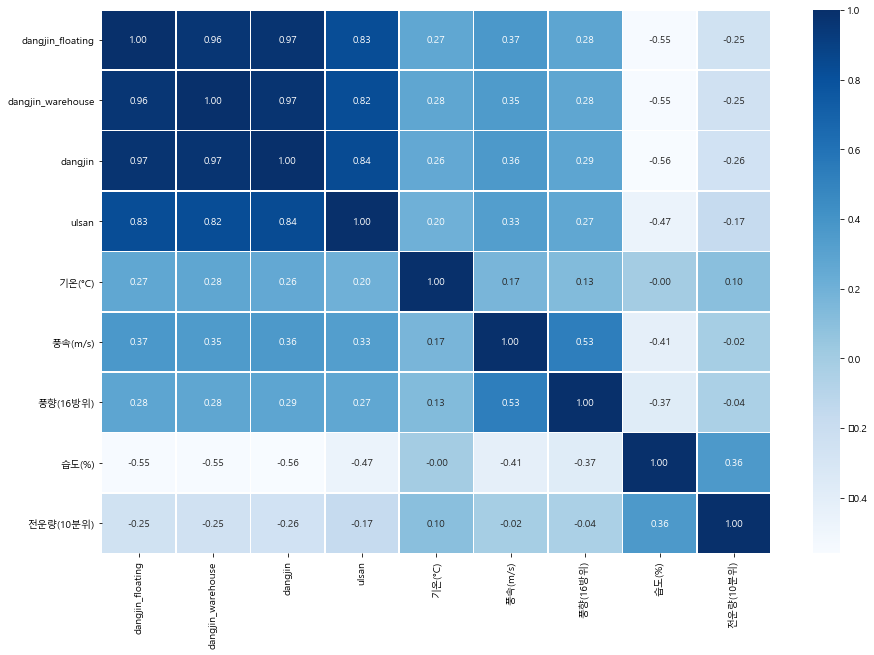

In [56]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = h.corr(), annot = True, fmt = '.2f', linewidths = .5, cmap = 'Blues')

# 모델링

## train, test 분리

In [220]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(h.drop(['dangjin_floating','dangjin_warehouse','dangjin','ulsan','일시'], axis = 1),h.iloc[:,[3]],test_size=0.2, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((20500, 5), (5126, 5), (20500, 1), (5126, 1))

In [221]:
from sklearn.tree import DecisionTreeRegressor

In [245]:
tree = DecisionTreeRegressor(random_state = 13, max_depth = 8)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

tree.score(X_test,y_test)

0.45816250687266047

In [223]:

from sklearn.ensemble import RandomForestRegressor

In [224]:
frst = RandomForestRegressor(random_state = 10)
frst.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [226]:
y_pred = frst.predict(X_test)
y_pred

array([ 79.89,  60.23, 268.41, ..., 347.11,  59.4 ,  22.45])

In [230]:
frst.score(X_test, y_test)

0.4767842118096778

In [246]:
from sklearn.metrics import mean_squared_error
import numpy as np

[ 37.94084507  27.37388988 427.95121951 ... 411.19018405  38.96991701
  20.65737456]


In [75]:
b.isna().sum()

지점              0
지점명             0
일시              0
기온(°C)          0
풍속(m/s)        36
풍향(16방위)       36
습도(%)          35
전운량(10분위)    3970
dtype: int64

In [74]:
b['기온(°C)'].fillna(0, inplace = True)

In [77]:
b[b['기온(°C)']==0]

,지점,지점명,일시,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
124,129,서산,2018-03-06 04:00:00,0.0,0.9,360.0,86.0,NaN
509,129,서산,2018-03-22 05:00:00,0.0,0.7,50.0,98.0,NaN
6592,129,서산,2018-11-30 22:00:00,0.0,0.5,20.0,80.0,4.0
6593,129,서산,2018-11-30 23:00:00,0.0,0.0,0.0,81.0,7.0
6829,129,서산,2018-12-10 19:00:00,0.0,1.2,20.0,52.0,0.0
...,...,...,...,...,...,...,...,...
24281,129,서산,2020-12-06 23:00:00,0.0,0.2,0.0,88.0,9.0
24315,129,서산,2020-12-08 09:00:00,0.0,1.4,70.0,62.0,5.0
24761,129,서산,2020-12-26 23:00:00,0.0,0.4,0.0,92.0,6.0
24921,129,서산,2021-01-02 15:00:00,0.0,3.3,320.0,52.0,0.0


In [81]:
import numpy as np
np.mean(h[h['dangjin_floating'] != 0])

dangjin_floating     246.766477
dangjin_warehouse    184.634345
dangjin              278.761082
ulsan                127.171084
지점                   129.000000
기온(°C)                15.719545
풍속(m/s)                2.439556
풍향(16방위)             201.155334
습도(%)                 64.720112
전운량(10분위)              5.174353
dtype: float64

In [84]:
np.mean(h)

dangjin_floating     121.966370
dangjin_warehouse     92.413559
dangjin              139.553188
ulsan                 64.119176
지점                   129.000000
기온(°C)                12.947657
풍속(m/s)                1.901407
풍향(16방위)             162.146151
습도(%)                 72.926791
전운량(10분위)              5.261636
dtype: float64

In [88]:
h[h['dangjin_floating'] != 0].describe()

,dangjin_floating,dangjin_warehouse,dangjin,ulsan,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,12654.000000,12654.000000,12678.000000,12678.000000,12678.0,12663.000000,12663.000000,12663.000000,12664.000000,10473.000000
mean,246.766477,184.634345,278.761082,127.171084,129.0,15.719545,2.439556,201.155334,64.720112,5.174353
std,209.205351,160.461374,241.238386,110.421886,0.0,9.779803,1.543796,127.185987,21.331059,3.759755
min,1.000000,0.000000,0.000000,0.000000,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,51.000000,35.000000,50.000000,23.000000,129.0,7.900000,1.300000,70.000000,49.000000,1.000000
50%,196.000000,145.000000,226.000000,99.000000,129.0,17.000000,2.300000,230.000000,63.000000,6.000000
75%,424.750000,321.000000,491.000000,225.000000,129.0,23.700000,3.400000,320.000000,83.000000,9.000000
max,753.000000,593.000000,867.000000,392.000000,129.0,36.800000,9.600000,360.000000,99.000000,10.000000


In [89]:
h.describe()

,dangjin_floating,dangjin_warehouse,dangjin,ulsan,지점,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
count,25602.000000,25578.000000,25626.000000,25626.000000,25626.0,25589.000000,25590.000000,25590.000000,25591.000000,21656.000000
mean,121.966370,92.413559,139.553188,64.119176,129.0,12.947657,1.901407,162.146151,72.926791,5.261636
std,191.972101,146.380540,220.417608,100.994031,0.0,10.163573,1.544590,133.924277,20.379724,3.805230
min,0.000000,0.000000,0.000000,0.000000,129.0,-19.300000,0.000000,0.000000,10.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,129.0,4.700000,0.700000,20.000000,57.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,129.0,13.500000,1.500000,180.000000,76.000000,6.000000
75%,191.000000,145.000000,226.000000,101.000000,129.0,21.500000,2.800000,290.000000,92.000000,9.000000
max,753.000000,593.000000,867.000000,392.000000,129.0,36.800000,11.700000,360.000000,99.000000,10.000000


In [90]:
h[h['dangjin_floating'] == 1]

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times,지점,지점명,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
354,2018-03-15 18:00:00,1.0,0.0,0,0,2018-03-15,18:00:00,129,서산,8.6,1.7,340.0,98.0,NaN
439,2018-03-19 07:00:00,1.0,0.0,0,0,2018-03-19,7:00:00,129,서산,7.0,3.2,20.0,98.0,NaN
654,2018-03-28 06:00:00,1.0,0.0,0,1,2018-03-28,6:00:00,129,서산,6.4,1.6,230.0,98.0,NaN
930,2018-04-08 18:00:00,1.0,0.0,0,6,2018-04-08,18:00:00,129,서산,9.7,8.2,230.0,66.0,NaN
955,2018-04-09 19:00:00,1.0,0.0,0,0,2018-04-09,19:00:00,129,서산,12.6,0.2,0.0,50.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25379,2021-01-21 17:00:00,1.0,0.0,0,0,2021-01-21,17:00:00,129,서산,5.9,0.8,340.0,97.0,10.0
25403,2021-01-22 17:00:00,1.0,1.0,0,0,2021-01-22,17:00:00,129,서산,5.3,1.9,20.0,95.0,10.0
25417,2021-01-23 07:00:00,1.0,0.0,0,0,2021-01-23,7:00:00,129,서산,4.7,1.6,20.0,91.0,7.0
25537,2021-01-28 07:00:00,1.0,0.0,0,0,2021-01-28,7:00:00,129,서산,-2.5,1.3,140.0,75.0,1.0


In [81]:
test = c['dangjin_floating']
test.index = c['일시']
test.head(9)

일시
2018-03-01 00:00:00     0.0
2018-03-01 01:00:00     0.0
2018-03-01 02:00:00     0.0
2018-03-01 03:00:00     0.0
2018-03-01 04:00:00     0.0
2018-03-01 05:00:00     0.0
2018-03-01 06:00:00     0.0
2018-03-01 07:00:00     0.0
2018-03-01 08:00:00    36.0
Name: dangjin_floating, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D93C74E48>],
      dtype=object)

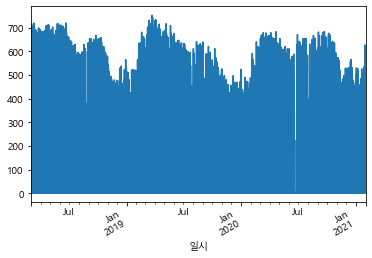

In [82]:
test.plot(subplots = True)

In [15]:
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

url = 'http://apis.data.go.kr/B090041/openapi/service/RiseSetInfoService/getAreaRiseSetInfo'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : 'nQJfEtLXFw5zk3G3jhUoKC4B17uVzxRQusoM0YcZUb2pwMFqdJnLlc1LzJnEo%2BO2WIbi%2F7vX8wT0n66Xt8eIxg%3D%3D',
                               quote_plus('locdate') : '20150101', quote_plus('location') : '천안' })

request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read()
print(response_body)

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [16]:
response_body.text

NameError: name 'response' is not defined

In [58]:
h = h.set_index('일시')

In [60]:
h

,dangjin_floating,dangjin_warehouse,dangjin,ulsan,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위)
일시,,,,,,,,,
2018-03-01 00:00:00,0.0,0.0,0.0,0.0,3.1,3.6,340.0,96.0,10.0
2018-03-01 01:00:00,0.0,0.0,0.0,0.0,2.8,0.7,140.0,97.0,10.0
2018-03-01 02:00:00,0.0,0.0,0.0,0.0,2.6,3.2,320.0,95.0,10.0
2018-03-01 03:00:00,0.0,0.0,0.0,0.0,2.0,1.9,230.0,97.0,10.0
2018-03-01 04:00:00,0.0,0.0,0.0,0.0,2.2,2.1,180.0,97.0,10.0
...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,0.0,0.0,0.0,0.0,6.7,1.5,200.0,75.0,8.0
2021-01-31 20:00:00,0.0,0.0,0.0,0.0,6.2,0.8,200.0,77.0,8.0
2021-01-31 21:00:00,0.0,0.0,0.0,0.0,5.3,0.7,230.0,82.0,8.0


In [61]:
h['월'] = h.index.month
h['년'] = h.index.year
split = '2020-01-01'
h_train = h[:split]
h_test = h[split:]

In [62]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16122 entries, 2018-03-01 00:00:00 to 2020-01-01 23:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dangjin_floating   16122 non-null  float64
 1   dangjin_warehouse  16122 non-null  float64
 2   dangjin            16122 non-null  float64
 3   ulsan              16122 non-null  float64
 4   기온(°C)             16122 non-null  float64
 5   풍속(m/s)            16122 non-null  float64
 6   풍향(16방위)           16122 non-null  float64
 7   습도(%)              16122 non-null  float64
 8   전운량(10분위)          16122 non-null  float64
 9   월                  16122 non-null  int64  
 10  년                  16122 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.5 MB


In [63]:
h_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9528 entries, 2020-01-01 00:00:00 to 2021-01-31 23:00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dangjin_floating   9528 non-null   float64
 1   dangjin_warehouse  9528 non-null   float64
 2   dangjin            9528 non-null   float64
 3   ulsan              9528 non-null   float64
 4   기온(°C)             9528 non-null   float64
 5   풍속(m/s)            9528 non-null   float64
 6   풍향(16방위)           9528 non-null   float64
 7   습도(%)              9528 non-null   float64
 8   전운량(10분위)          9528 non-null   float64
 9   월                  9528 non-null   int64  
 10  년                  9528 non-null   int64  
dtypes: float64(9), int64(2)
memory usage: 893.2 KB


In [66]:
h_train_y = h_train.loc[:,'dangjin']
h_train_x = h_train.drop(['dangjin','dangjin_floating','dangjin_warehouse','ulsan'], axis = 1)

In [77]:
h_test_y = h_test.loc[:,'dangjin']
h_test_x = h_test.drop(['dangjin','dangjin_floating','dangjin_warehouse','ulsan'], axis = 1)
h_test_orig = h_test.loc[:,['dangjin', '기온(°C)', '풍속(m/s)','습도(%)','전운량(10분위)','월','년']]

In [72]:
train_x = np.array(h_train_x).reshape(h_train_x.shape[0], h_train_x.shape[1], 1)
test_x = np.array(h_test_x).reshape(h_test_x.shape[0], h_test_x.shape[1], 1)

In [74]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, Adadelta, Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [75]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units = 128, input_shape = (train_x.shape[1], train_x.shape[2])))
model.add(keras.layers.Dropout(rate = 0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [76]:
history = model.fit(train_x, h_train_y, validation_split=0.1, batch_size = 10, epochs = 100)

Train on 14509 samples, validate on 1613 samples
Epoch 1/100
14509/14509 [==============================] - 30s 2ms/step - loss: 60651.2773 - val_loss: 25882.2582
Epoch 2/100
14509/14509 [==============================] - 29s 2ms/step - loss: 46927.1177 - val_loss: 22205.7558
Epoch 3/100
14509/14509 [==============================] - 29s 2ms/step - loss: 39024.3209 - val_loss: 23288.0184
Epoch 4/100
14509/14509 [==============================] - 25s 2ms/step - loss: 35372.0645 - val_loss: 20455.8274
Epoch 5/100
14509/14509 [==============================] - 27s 2ms/step - loss: 32689.7812 - val_loss: 18767.7387
Epoch 6/100
14509/14509 [==============================] - 23s 2ms/step - loss: 31212.8563 - val_loss: 18890.9848
Epoch 7/100
14509/14509 [==============================] - 25s 2ms/step - loss: 30382.2403 - val_loss: 18281.4927
Epoch 8/100
14509/14509 [==============================] - 26s 2ms/step - loss: 30040.9711 - val_loss: 18999.5251
Epoch 9/100
14509/14509 [==============

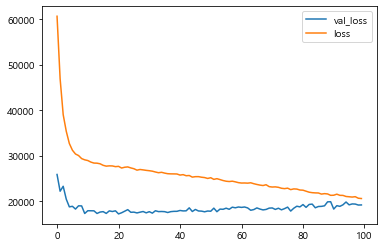

In [78]:
pd.DataFrame.from_dict(history.history).plot()

In [124]:
type(h['월'])

pandas.core.series.Series

In [127]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = ['dangjin','기온(°C)','풍속(m/s)','습도(%)']
h_scaled = scaler.fit_transform(h[scaled_cols])
h_scaled = pd.DataFrame(h_scaled)
h_scaled.columns = scaled_cols

h_scaled['월'] = np.array(h['월'])
h_scaled['년'] = np.array(h['년'])
h_scaled

,dangjin,기온(°C),풍속(m/s),습도(%),월,년
0,0.0,0.399287,0.307692,0.966292,3,2018
1,0.0,0.393939,0.059829,0.977528,3,2018
2,0.0,0.390374,0.273504,0.955056,3,2018
3,0.0,0.379679,0.162393,0.977528,3,2018
4,0.0,0.383244,0.179487,0.977528,3,2018
...,...,...,...,...,...,...
25621,0.0,0.463458,0.128205,0.730337,1,2021
25622,0.0,0.454545,0.068376,0.752809,1,2021
25623,0.0,0.438503,0.059829,0.808989,1,2021
25624,0.0,0.447415,0.085470,0.752809,1,2021


In [128]:
TEST_SIZE = 1000
WINDOW_SIZE = 20

train = h_scaled[:-TEST_SIZE]
test = h_scaled[-TEST_SIZE:]

In [129]:
def make_dataset(data, label, window_size = 20):
    feature_list = []
    label_list = []
    for i in range(len(data)-window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [139]:
from sklearn.model_selection import train_test_split

feature_cols = ['기온(°C)','풍속(m/s)','습도(%)']
label_cols = ['dangjin']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size = 0.2)
x_train.shape, x_valid.shape

((19684, 20, 3), (4922, 20, 3))

In [140]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

((1000, 3), (1000, 1))

In [141]:
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((980, 20, 3), (980, 1))

In [142]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, input_shape = (train_feature.shape[1], train_feature.shape[2]),
              activation = 'relu', return_sequences = False))
model.add(Dense(1))  # 예측하고자 하는 target 개수

In [143]:
import os

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(x_train, y_train, epochs = 50, batch_size = 20,
                   validation_data = (x_valid, y_valid))
# 속성

# epochs : 반복 횟수
# batch_size : numpy데이터를 작은 배치로 나누고 이 배치를 순회, 배치의 크기 지정
# validation_data : 검증데이터 삿용하여 epochs마다 검증데이터 정확도 출력, loss가 낮아지다 높아지면 과적합의 신호
# validation_split : 검증데이터 대신 사용하고 별도의 검증데이터가 없을 때 train데이터를 분리하여 검증데이터로 사용
# verbose : 훈련의 진행과정 보여줌

Train on 19684 samples, validate on 4922 samples
Epoch 1/50
19684/19684 [==============================] - 12s 604us/step - loss: 0.0393 - val_loss: 0.0243
Epoch 2/50
19684/19684 [==============================] - 11s 571us/step - loss: 0.0249 - val_loss: 0.0229
Epoch 3/50
19684/19684 [==============================] - 12s 587us/step - loss: 0.0226 - val_loss: 0.0198
Epoch 4/50
19684/19684 [==============================] - 16s 818us/step - loss: 0.0213 - val_loss: 0.0192
Epoch 5/50
19684/19684 [==============================] - 16s 833us/step - loss: 0.0206 - val_loss: 0.0182
Epoch 6/50
19684/19684 [==============================] - 17s 856us/step - loss: 0.0200 - val_loss: 0.0179
Epoch 7/50
19684/19684 [==============================] - 17s 871us/step - loss: 0.0196 - val_loss: 0.0184
Epoch 8/50
19684/19684 [==============================] - 17s 879us/step - loss: 0.0192 - val_loss: 0.0174
Epoch 9/50
19684/19684 [==============================] - 17s 841us/step - loss: 0.0190 - val_l

In [144]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________


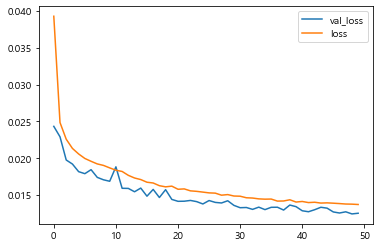

In [145]:
pd.DataFrame.from_dict(history.history).plot()

In [146]:
# model.load_weights(filename)
pred = model.predict(test_feature)

pd.DataFrame(pred)

,0
0,0.015205
1,0.017420
2,0.032415
3,0.071751
4,0.172511
...,...
975,0.009575
976,0.006746
977,0.007303
978,0.004730


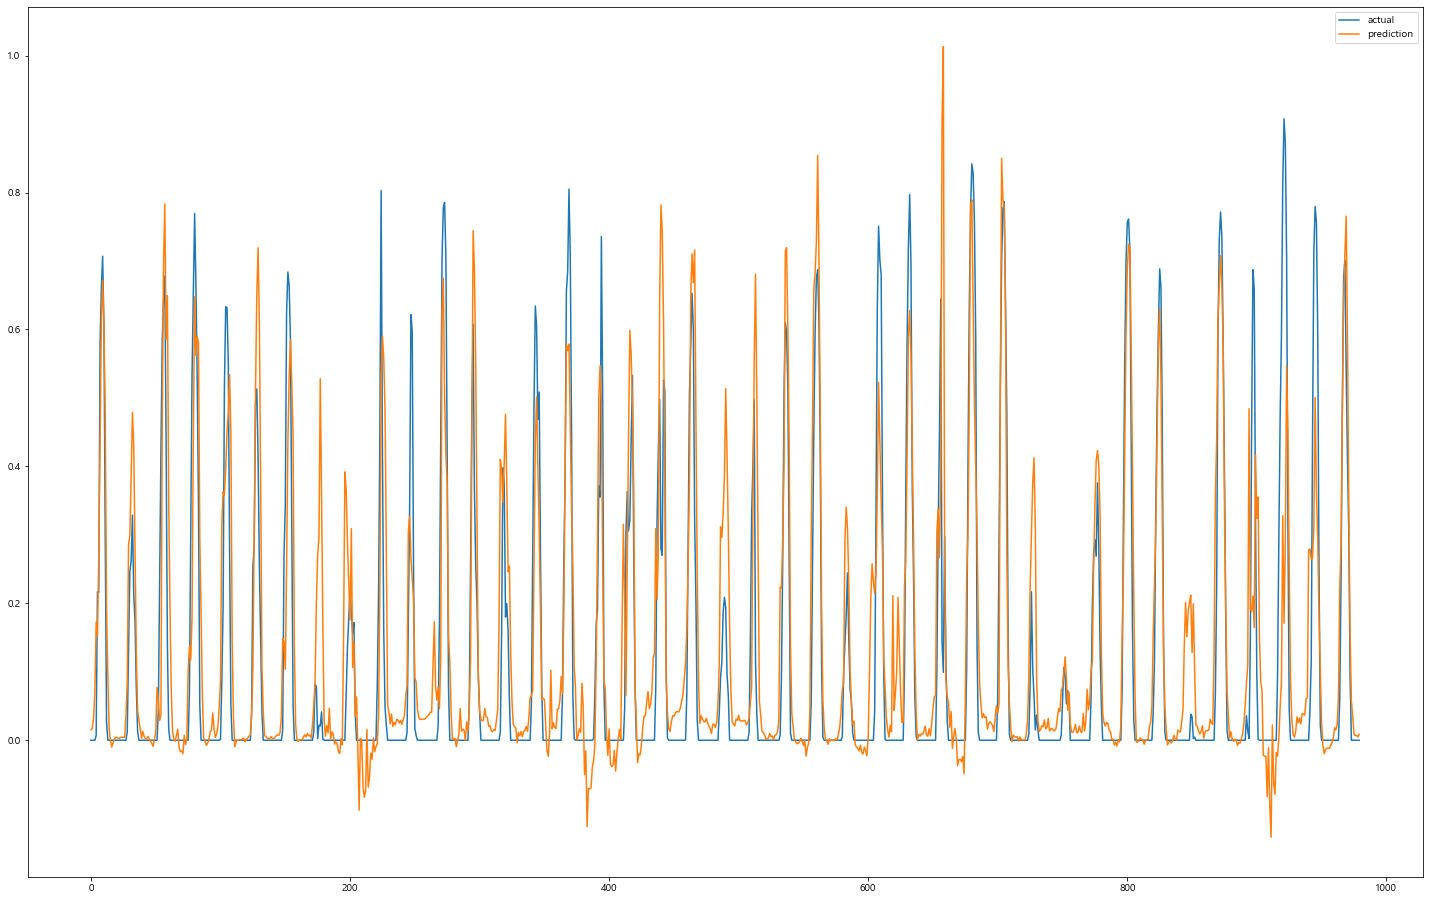

In [151]:
plt.figure(figsize=(25,16))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [155]:
c

,일시,dangjin_floating,dangjin_warehouse,dangjin,ulsan,date,times
0,2018-03-01 00:00:00,0.0,0.0,0,0,2018-03-01,0:00:00
1,2018-03-01 01:00:00,0.0,0.0,0,0,2018-03-01,1:00:00
2,2018-03-01 02:00:00,0.0,0.0,0,0,2018-03-01,2:00:00
3,2018-03-01 03:00:00,0.0,0.0,0,0,2018-03-01,3:00:00
4,2018-03-01 04:00:00,0.0,0.0,0,0,2018-03-01,4:00:00
...,...,...,...,...,...,...,...
25627,2021-01-31 19:00:00,0.0,0.0,0,0,2021-01-31,19:00:00
25628,2021-01-31 20:00:00,0.0,0.0,0,0,2021-01-31,20:00:00
25629,2021-01-31 21:00:00,0.0,0.0,0,0,2021-01-31,21:00:00
25630,2021-01-31 22:00:00,0.0,0.0,0,0,2021-01-31,22:00:00


In [160]:
h['hour'] = h.index.hour

In [161]:
h

,dangjin_floating,dangjin_warehouse,dangjin,ulsan,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),월,년,hour
일시,,,,,,,,,,,,
2018-03-01 00:00:00,0.0,0.0,0.0,0.0,3.1,3.6,340.0,96.0,10.0,3,2018,0
2018-03-01 01:00:00,0.0,0.0,0.0,0.0,2.8,0.7,140.0,97.0,10.0,3,2018,1
2018-03-01 02:00:00,0.0,0.0,0.0,0.0,2.6,3.2,320.0,95.0,10.0,3,2018,2
2018-03-01 03:00:00,0.0,0.0,0.0,0.0,2.0,1.9,230.0,97.0,10.0,3,2018,3
2018-03-01 04:00:00,0.0,0.0,0.0,0.0,2.2,2.1,180.0,97.0,10.0,3,2018,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,0.0,0.0,0.0,0.0,6.7,1.5,200.0,75.0,8.0,1,2021,19
2021-01-31 20:00:00,0.0,0.0,0.0,0.0,6.2,0.8,200.0,77.0,8.0,1,2021,20
2021-01-31 21:00:00,0.0,0.0,0.0,0.0,5.3,0.7,230.0,82.0,8.0,1,2021,21


In [163]:
h.drop(['월','년'], axis = 1, inplace = True)

In [164]:
h

,dangjin_floating,dangjin_warehouse,dangjin,ulsan,기온(°C),풍속(m/s),풍향(16방위),습도(%),전운량(10분위),hour
일시,,,,,,,,,,
2018-03-01 00:00:00,0.0,0.0,0.0,0.0,3.1,3.6,340.0,96.0,10.0,0
2018-03-01 01:00:00,0.0,0.0,0.0,0.0,2.8,0.7,140.0,97.0,10.0,1
2018-03-01 02:00:00,0.0,0.0,0.0,0.0,2.6,3.2,320.0,95.0,10.0,2
2018-03-01 03:00:00,0.0,0.0,0.0,0.0,2.0,1.9,230.0,97.0,10.0,3
2018-03-01 04:00:00,0.0,0.0,0.0,0.0,2.2,2.1,180.0,97.0,10.0,4
...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,0.0,0.0,0.0,0.0,6.7,1.5,200.0,75.0,8.0,19
2021-01-31 20:00:00,0.0,0.0,0.0,0.0,6.2,0.8,200.0,77.0,8.0,20
2021-01-31 21:00:00,0.0,0.0,0.0,0.0,5.3,0.7,230.0,82.0,8.0,21
